### Importing Libraries¶¶
The following script imports required libraries:

In [274]:
# Importing required packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Importing the Dataset
Since our file is in CSV format, we will use panda's read_csv method to read our CSV data file. Execute the following script to do so:

In [275]:
os.chdir(r"C:\PGA32\Machine Learning\Capstone_Project")

In [276]:
heart=pd.read_csv("heart_disease.csv")

In [277]:
heart.head(8)

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0    Male   39   postgraduate              0         0.0     0.0   
1  Female   46  primaryschool              0         0.0     0.0   
2    Male   48     uneducated              1        20.0     0.0   
3  Female   61       graduate              1        30.0     0.0   
4  Female   46       graduate              1        23.0     0.0   
5  Female   43  primaryschool              0         0.0     0.0   
6  Female   63     uneducated              0         0.0     0.0   
7  Female   45  primaryschool              1        20.0     0.0   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0              no             0         0    195.0  106.0   70.0  26.97   
1              no             0         0    250.0  121.0   81.0  28.73   
2              no             0         0    245.0  127.5   80.0  25.34   
3              no             1         0    225.0  150.0   95.0  28.58   
4              no             0         0    285.0  130.0   84.0  23.10   
5              no             1         0    228.0  180.0  110.0  30.30   
6              no             0         0    205.0  138.0   71.0  33.11   
7              no             0         0    313.0  100.0   71.0  21.68   

   heartRate  glucose Heart_ stroke  
0       80.0     77.0            No  
1       95.0     76.0            No  
2       75.0     70.0            No  
3       65.0    103.0           yes  
4       85.0     85.0            No  
5       77.0     99.0            No  
6       60.0     85.0           yes  
7       79.0     78.0            No

In [278]:
heart.shape

(4238, 16)

In [279]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


### Missing Value Treatment

In [280]:
heart.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [281]:
def missingValues(heart):
    n=heart.isnull().sum()
    n1=(heart.isnull().sum()/ heart.shape[0]*100)
    c_cat=pd.concat([n, n1], axis=1, keys=["Missing", "Percentage"])
    c_cat=c_cat.sort_values(by ="Percentage", ascending=False)
    c_cat=c_cat[c_cat["Missing"]>0]
    return c_cat

In [282]:
missingValues(heart)

Missing  Percentage
glucose         388    9.155262
education       105    2.477584
BPMeds           53    1.250590
totChol          50    1.179802
cigsPerDay       29    0.684285
BMI              19    0.448325
heartRate         1    0.023596

In [283]:
heart.drop(columns=["prevalentStroke"], inplace=True)

In [284]:
heart

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39   postgraduate              0         0.0     0.0   
1     Female   46  primaryschool              0         0.0     0.0   
2       Male   48     uneducated              1        20.0     0.0   
3     Female   61       graduate              1        30.0     0.0   
4     Female   46       graduate              1        23.0     0.0   
...      ...  ...            ...            ...         ...     ...   
4233    Male   50     uneducated              1         1.0     0.0   
4234    Male   51       graduate              1        43.0     0.0   
4235  Female   48  primaryschool              1        20.0     NaN   
4236  Female   44     uneducated              1        15.0     0.0   
4237  Female   52  primaryschool              0         0.0     0.0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   
3                1         0    225.0  150.0   95.0  28.58       65.0   
4                0         0    285.0  130.0   84.0  23.10       85.0   
...            ...       ...      ...    ...    ...    ...        ...   
4233             1         0    313.0  179.0   92.0  25.97       66.0   
4234             0         0    207.0  126.5   80.0  19.71       65.0   
4235             0         0    248.0  131.0   72.0  22.00       84.0   
4236             0         0    210.0  126.5   87.0  19.16       86.0   
4237             0         0    269.0  133.5   83.0  21.47       80.0   

      glucose Heart_ stroke  
0        77.0            No  
1        76.0            No  
2        70.0            No  
3       103.0           yes  
4        85.0            No  
...       ...           ...  
4233     86.0           yes  
4234     68.0            No  
4235     86.0            No  
4236      NaN            No  
4237    107.0            No  

[4238 rows x 15 columns]

In [285]:
heart["glucose"]=heart["glucose"].fillna(heart["glucose"].mean())

In [286]:
heart['education'] = heart['education'].fillna('None')

In [287]:
heart["BPMeds"]=heart["BPMeds"].fillna(heart["BPMeds"].mean())

In [288]:
heart["totChol"]=heart["totChol"].fillna(heart["totChol"].mean())

In [289]:
heart["cigsPerDay"]=heart["cigsPerDay"].fillna(heart["cigsPerDay"].mean())

In [290]:
heart["BMI"]=heart["BMI"].fillna(heart["BMI"].mean())

In [291]:
heart["heartRate"]=heart["heartRate"].fillna(heart["heartRate"].mean())

In [292]:
heart.isnull().sum()

Gender           0
age              0
education        0
currentSmoker    0
cigsPerDay       0
BPMeds           0
prevalentHyp     0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Heart_ stroke    0
dtype: int64

## Visualizing Numerical Features

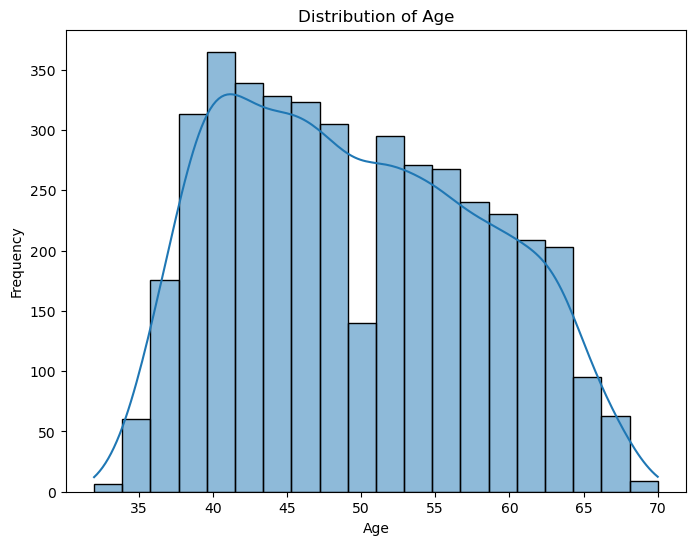

In [293]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

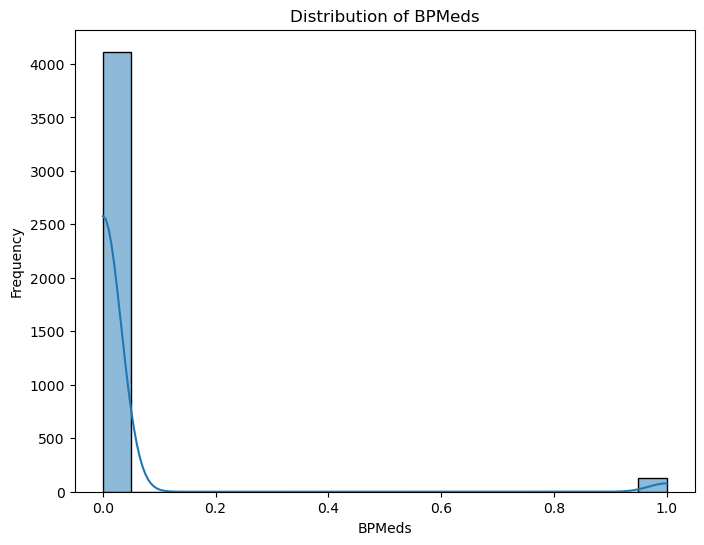

In [294]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['BPMeds'], bins=20, kde=True)
plt.xlabel('BPMeds')
plt.ylabel('Frequency')
plt.title('Distribution of BPMeds')
plt.show()

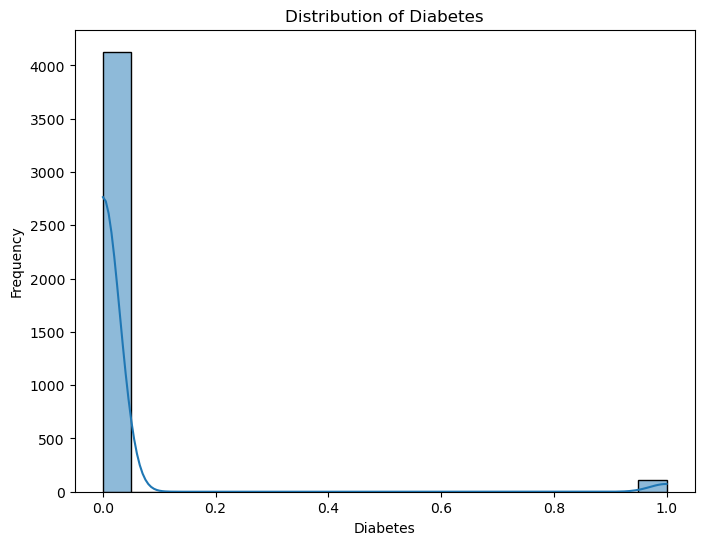

In [295]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['diabetes'], bins=20, kde=True)
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes')
plt.show()

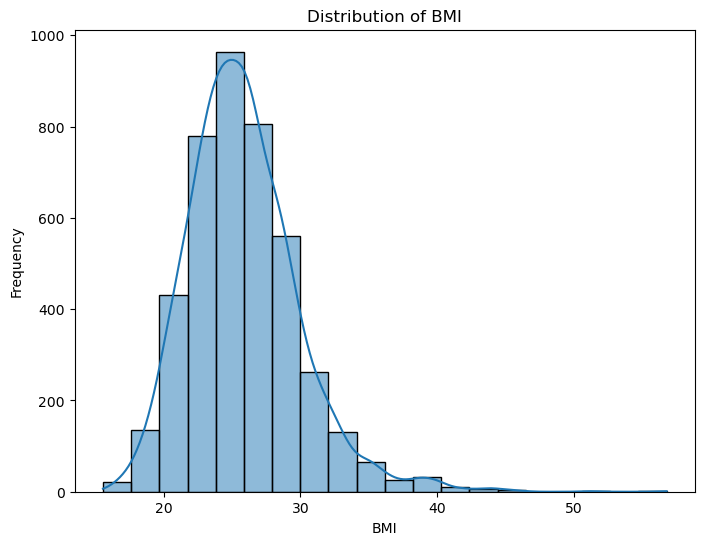

In [296]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['BMI'], bins=20, kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

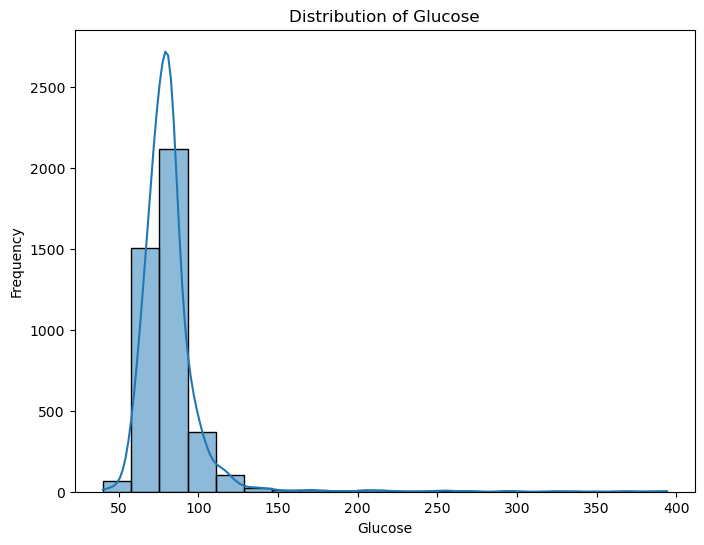

In [297]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['glucose'], bins=20, kde=True)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')
plt.show()

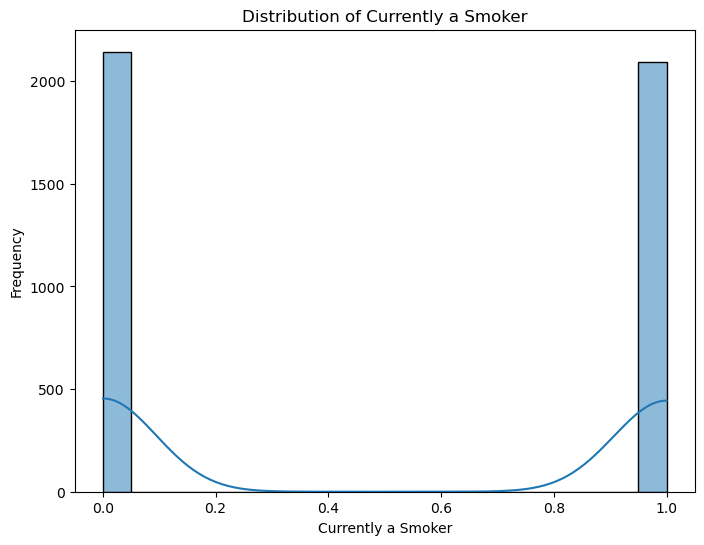

In [298]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['currentSmoker'], bins=20, kde=True)
plt.xlabel('Currently a Smoker')
plt.ylabel('Frequency')
plt.title('Distribution of Currently a Smoker')
plt.show()

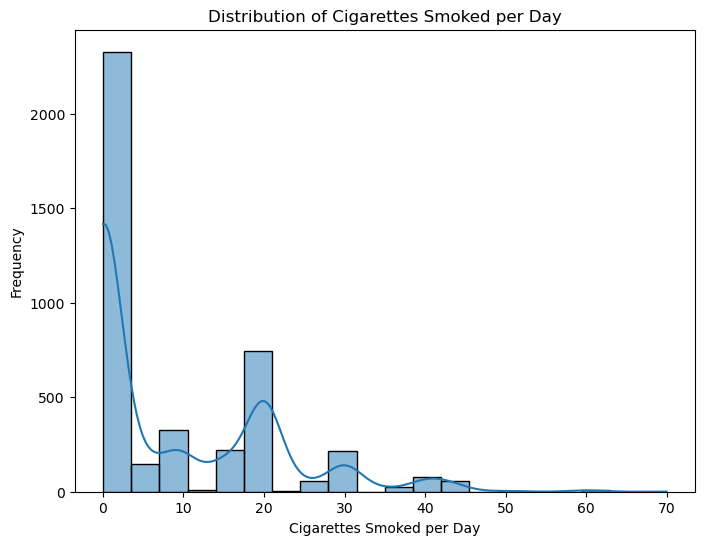

In [299]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['cigsPerDay'], bins=20, kde=True)
plt.xlabel('Cigarettes Smoked per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Cigarettes Smoked per Day')
plt.show()

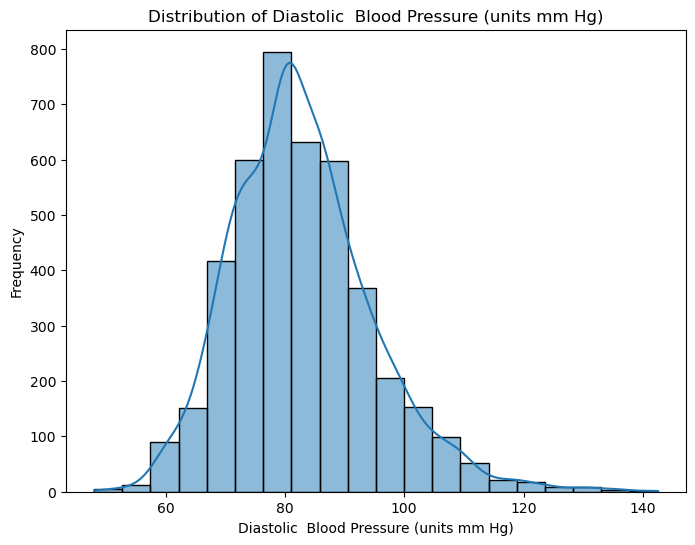

In [300]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['diaBP'], bins=20, kde=True)
plt.xlabel('Diastolic  Blood Pressure (units mm Hg)')
plt.ylabel('Frequency')
plt.title('Distribution of Diastolic  Blood Pressure (units mm Hg)')
plt.show()

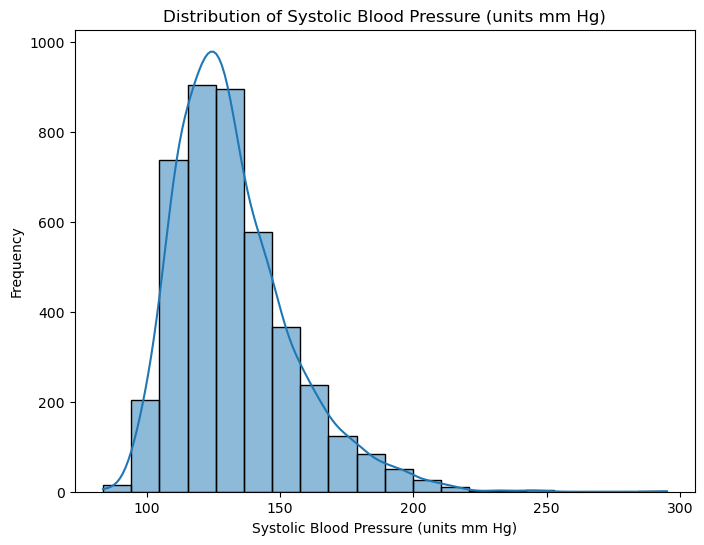

In [301]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['sysBP'], bins=20, kde=True)
plt.xlabel('Systolic Blood Pressure (units mm Hg)')
plt.ylabel('Frequency')
plt.title('Distribution of Systolic Blood Pressure (units mm Hg)')
plt.show()

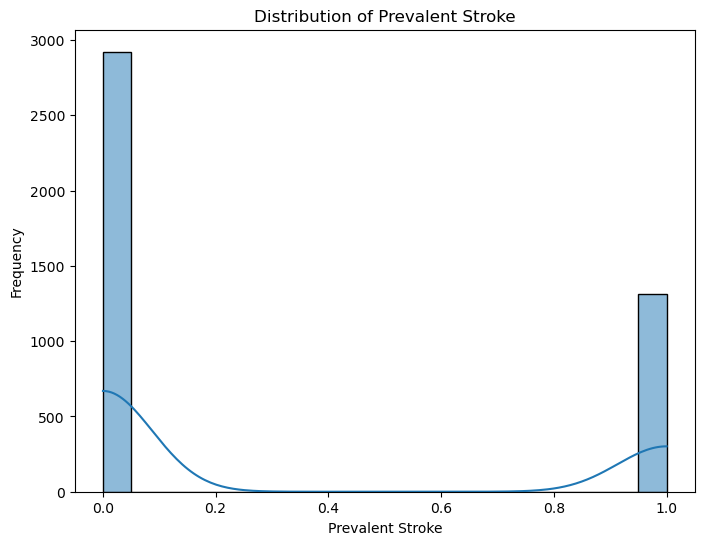

In [302]:
plt.figure(figsize=(8, 6))
sns.histplot(heart['prevalentHyp'], bins=20, kde=True)
plt.xlabel('Prevalent Stroke')
plt.ylabel('Frequency')
plt.title('Distribution of Prevalent Stroke')
plt.show()

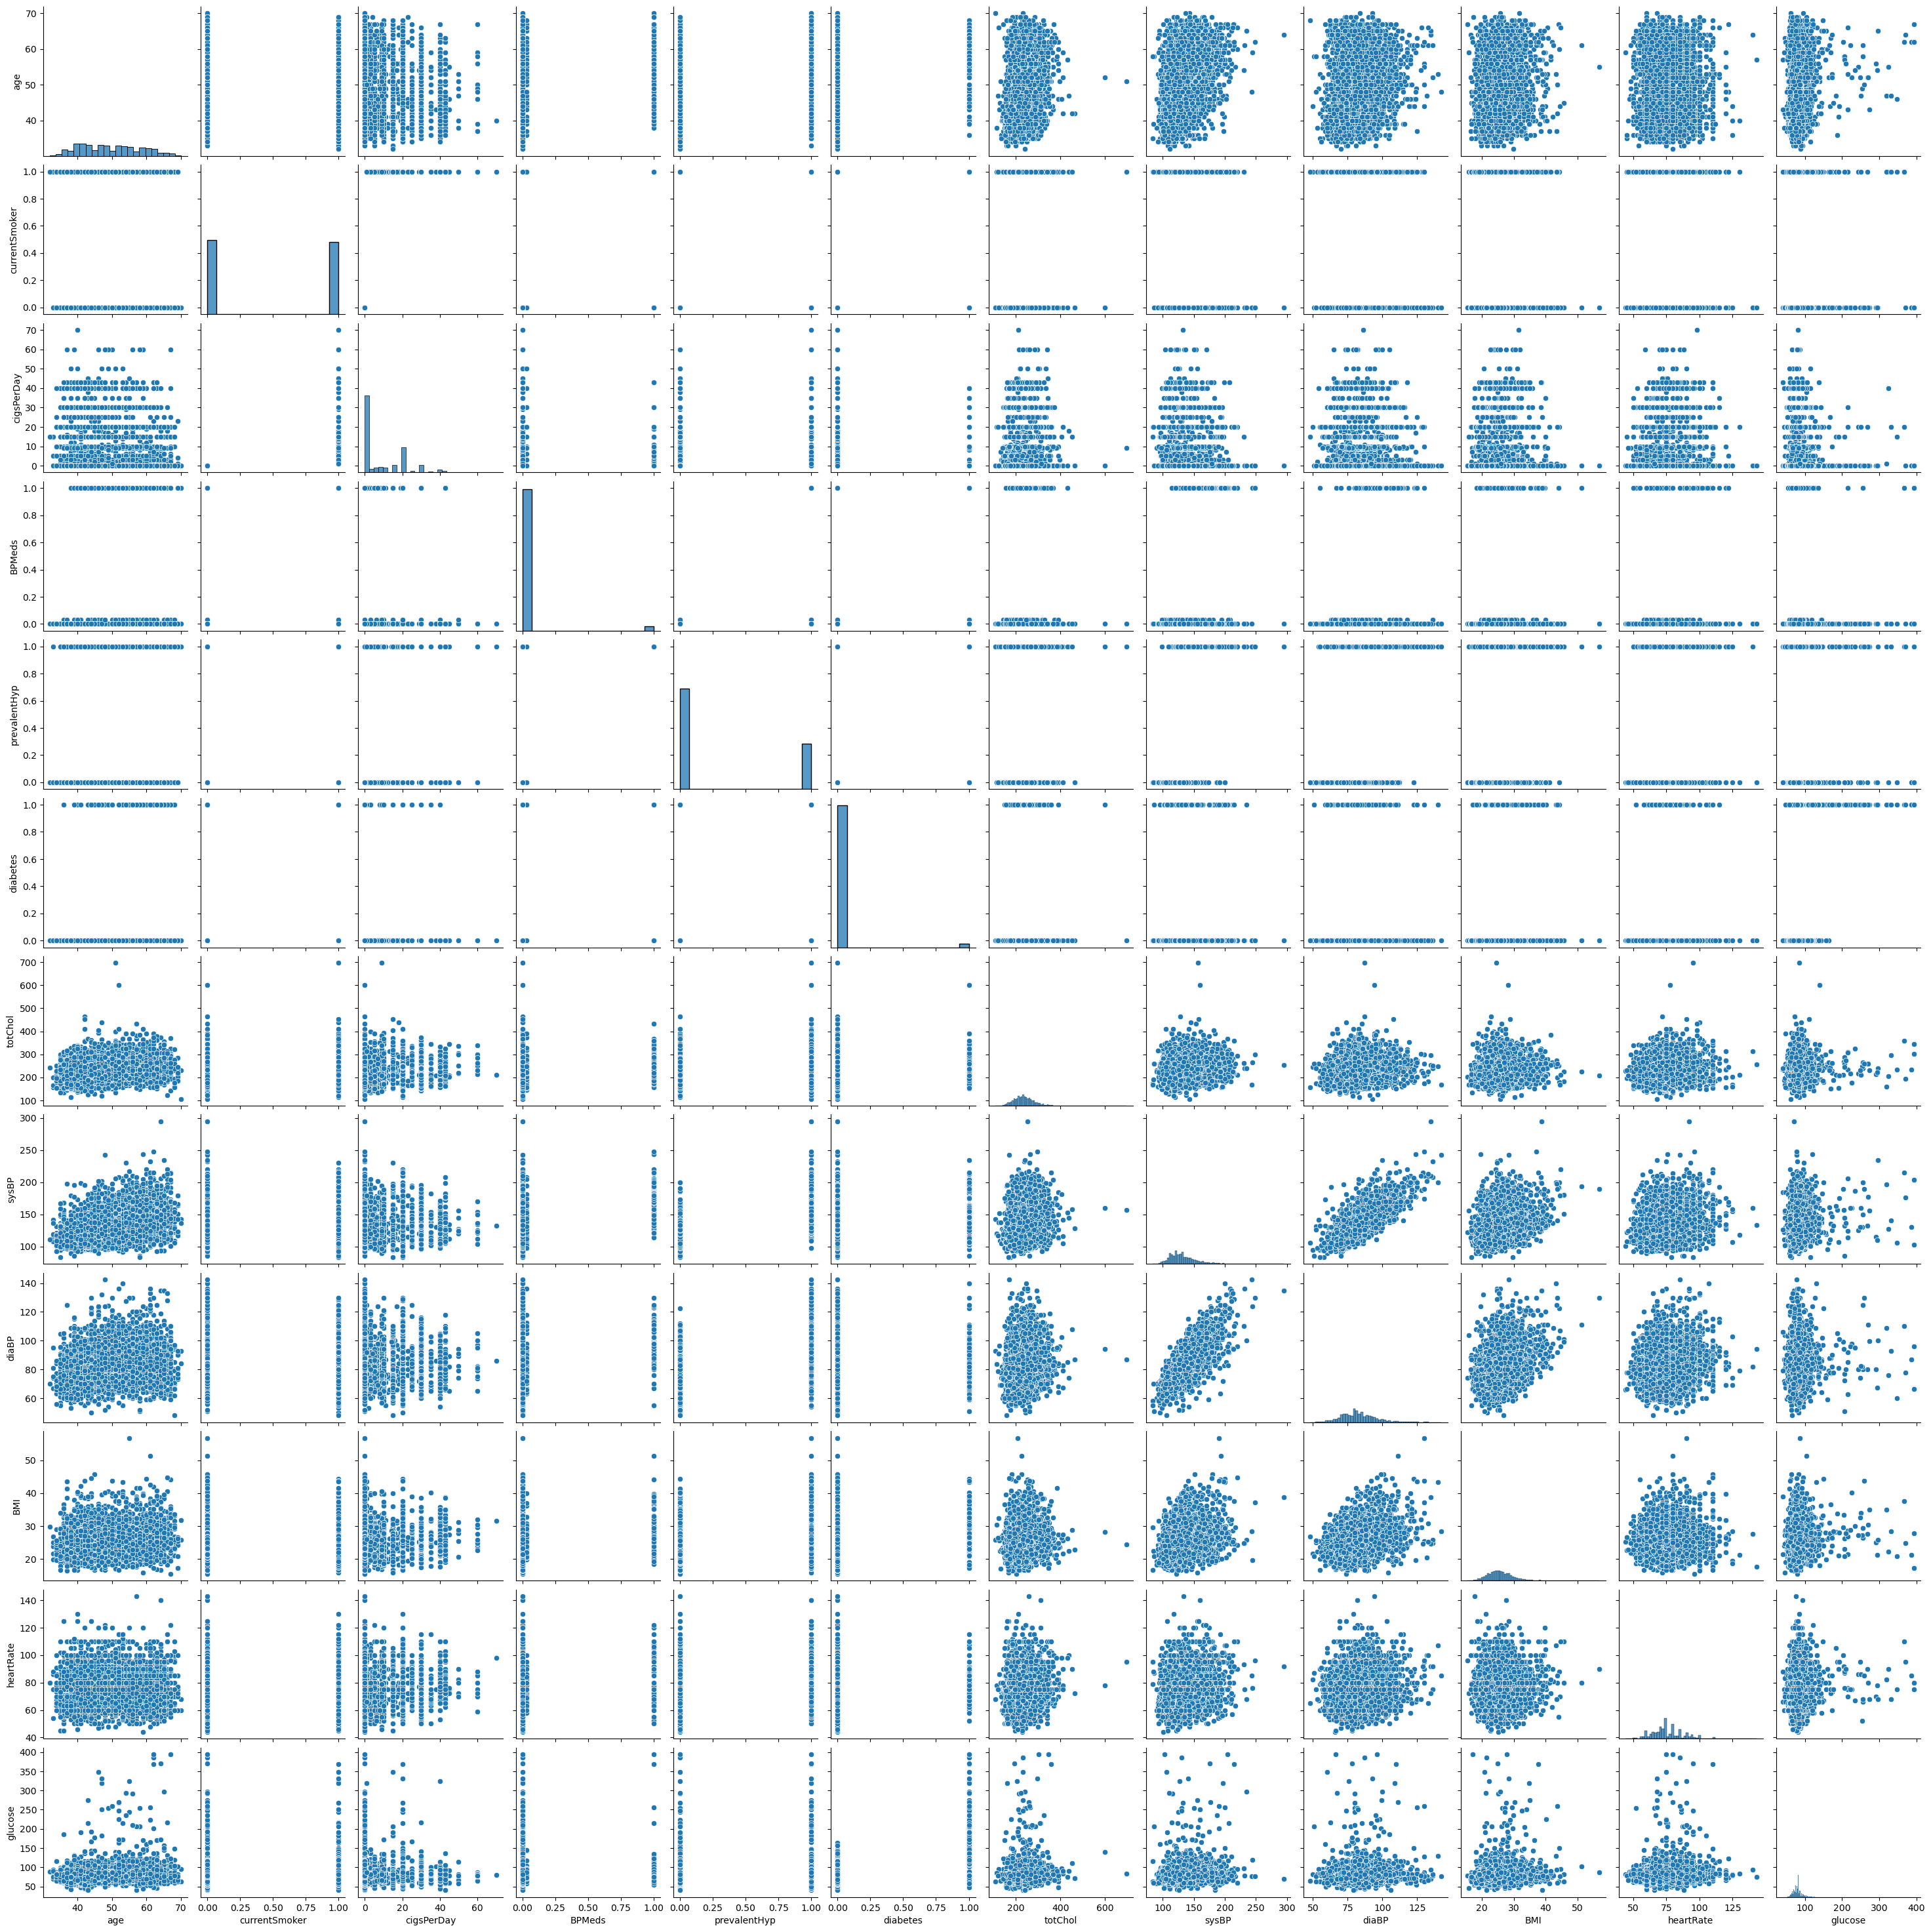

In [336]:
sns.pairplot(heart)
plt.show()

## EDA  : (Exploratory Data Analysis) Numerical Features With Outlier Treatment

In [337]:
num_var=heart.dtypes[heart.dtypes!="object"]
num_var

age                int64
currentSmoker      int64
cigsPerDay       float64
BPMeds           float64
prevalentHyp       int64
diabetes           int64
totChol          float64
sysBP            float64
diaBP            float64
BMI              float64
heartRate        float64
glucose          float64
dtype: object

In [338]:
heart.describe(percentiles=[.10, .20, .25, .35, .50, .65, .75, .85, .95, .96, .97, .98, .99])

age  currentSmoker   cigsPerDay      BPMeds  prevalentHyp  \
count  4238.000000    4238.000000  4238.000000  4238.00000   4238.000000   
mean     49.584946       0.494101     9.003089     0.02963      0.310524   
std       8.572160       0.500024    11.879230     0.16852      0.462763   
min      32.000000       0.000000     0.000000     0.00000      0.000000   
10%      39.000000       0.000000     0.000000     0.00000      0.000000   
20%      41.000000       0.000000     0.000000     0.00000      0.000000   
25%      42.000000       0.000000     0.000000     0.00000      0.000000   
35%      45.000000       0.000000     0.000000     0.00000      0.000000   
50%      49.000000       0.000000     0.000000     0.00000      0.000000   
65%      53.000000       1.000000    10.000000     0.00000      0.000000   
75%      56.000000       1.000000    20.000000     0.00000      1.000000   
85%      60.000000       1.000000    20.000000     0.00000      1.000000   
95%      64.000000       1.000000    30.000000     0.00000      1.000000   
96%      64.000000       1.000000    35.000000     0.02963      1.000000   
97%      65.000000       1.000000    40.000000     0.02963      1.000000   
98%      66.000000       1.000000    40.000000     1.00000      1.000000   
99%      67.000000       1.000000    43.000000     1.00000      1.000000   
max      70.000000       1.000000    70.000000     1.00000      1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean      0.025720   236.721585   132.352407    82.893464    25.802008   
std       0.158316    44.326453    22.038097    11.910850     4.070953   
min       0.000000   107.000000    83.500000    48.000000    15.540000   
10%       0.000000   184.000000   108.850000    69.000000    21.100000   
20%       0.000000   200.000000   114.000000    73.000000    22.530000   
25%       0.000000   206.000000   117.000000    75.000000    23.080000   
35%       0.000000   218.000000   122.000000    78.000000    24.050000   
50%       0.000000   234.000000   128.000000    82.000000    25.410000   
65%       0.000000   250.000000   136.000000    86.000000    26.820000   
75%       0.000000   262.000000   144.000000    89.875000    28.037500   
85%       0.000000   280.000000   154.000000    94.000000    29.510000   
95%       0.000000   312.000000   175.000000   104.575000    32.771500   
96%       0.000000   319.520000   179.760000   106.000000    33.505600   
97%       0.000000   326.000000   184.445000   108.945000    34.690000   
98%       1.000000   340.000000   191.000000   111.000000    36.047800   
99%       1.000000   353.630000   200.000000   118.000000    38.952600   
max       1.000000   696.000000   295.000000   142.500000    56.800000   

         heartRate      glucose  
count  4238.000000  4238.000000  
mean     75.878924    81.966753  
std      12.025177    22.836603  
min      44.000000    40.000000  
10%      60.000000    66.000000  
20%      65.000000    70.000000  
25%      68.000000    72.000000  
35%      70.000000    75.000000  
50%      75.000000    80.000000  
65%      80.000000    82.000000  
75%      83.000000    85.000000  
85%      88.000000    92.000000  
95%      98.000000   107.000000  
96%     100.000000   112.000000  
97%     100.000000   117.000000  
98%     105.000000   126.000000  
99%     110.000000   170.000000  
max     143.000000   394.000000

In [339]:
def univariate_numerical(data,var,graph_plot=True):
    missing=data[var].isnull().sum()
    min_n=data[var].min()
    max_n=data[var].max()
    var_n=data[var].var()
    std_n=data[var].std()
    p1=data[var].quantile(.01)
    p10=data[var].quantile(.1)
    p25=data[var].quantile(.25)
    p50=data[var].quantile(.5)
    p75=data[var].quantile(.75)
    p90=data[var].quantile(.9)
    p99=data[var].quantile(.99)
    iqr=p75-p25
    skewness=data[var].skew()
    
    if graph_plot==True:
        plt.hist(data[var])
        plt.show()
        sns.boxplot(y=data[var])
        plt.show()
        
    results={"missing":missing,"min":min_n,"max":max_n,"var":var_n,"std":std_n,
            "p1":p1,"p10":p10,"p25":p25,"p50":p50,"p75":p75,"p90":p90,"p99":p99,"skewness":skewness}
    return results

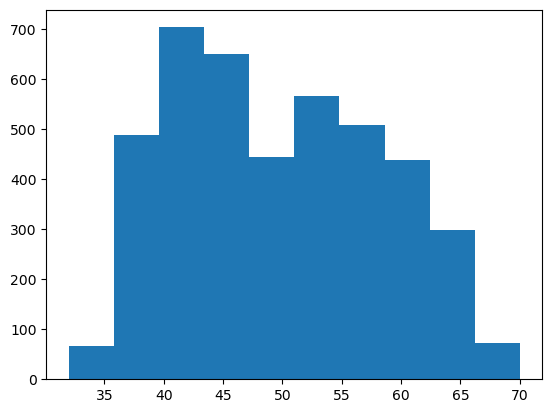

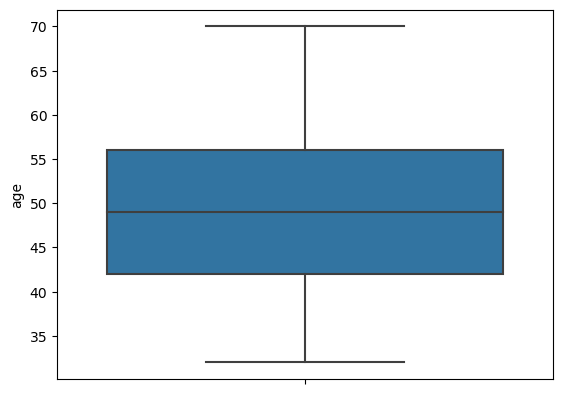

{'missing': 0,
 'min': 32,
 'max': 70,
 'var': 73.48192578180775,
 'std': 8.572159925118507,
 'p1': 35.0,
 'p10': 39.0,
 'p25': 42.0,
 'p50': 49.0,
 'p75': 56.0,
 'p90': 62.0,
 'p99': 67.0,
 'skewness': 0.22814577725541219}

In [340]:
univariate_numerical(data=heart, var="age")

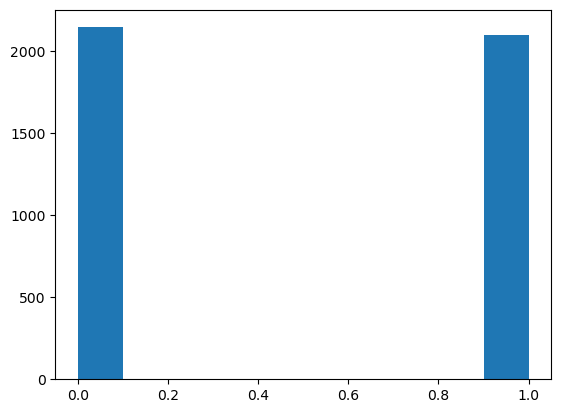

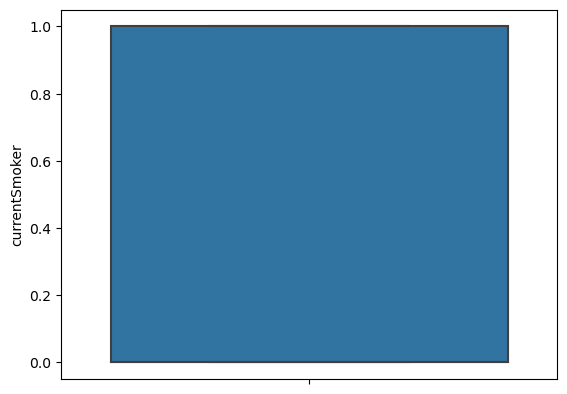

{'missing': 0,
 'min': 0,
 'max': 1,
 'var': 0.2500241974925302,
 'std': 0.5000241969070399,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 0.0,
 'p75': 1.0,
 'p90': 1.0,
 'p99': 1.0,
 'skewness': 0.02360603419565111}

In [341]:
univariate_numerical(data=heart, var="currentSmoker")

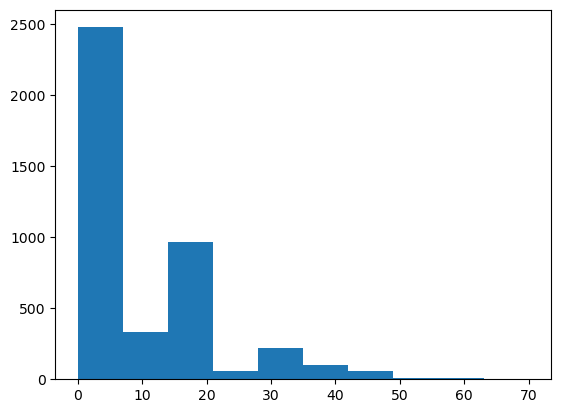

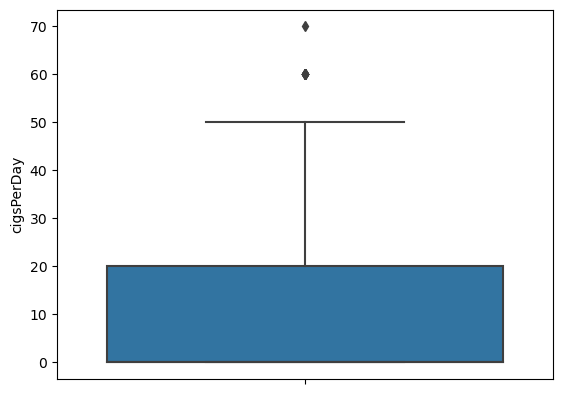

{'missing': 0,
 'min': 0.0,
 'max': 70.0,
 'var': 141.1161104196255,
 'std': 11.879230211576232,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 0.0,
 'p75': 20.0,
 'p90': 25.0,
 'p99': 43.0,
 'skewness': 1.2521985155774051}

In [342]:
univariate_numerical(data=heart, var="cigsPerDay")

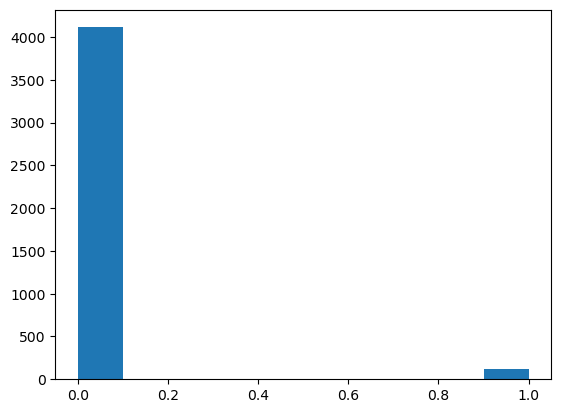

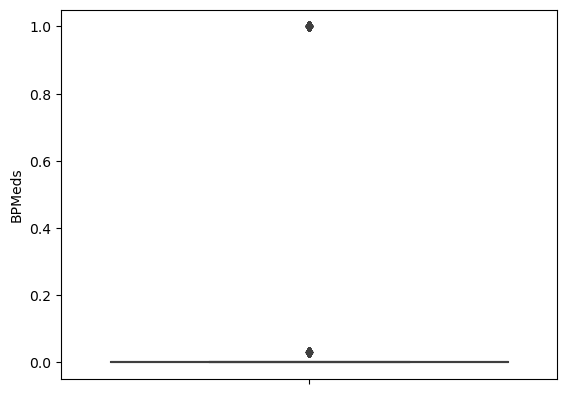

{'missing': 0,
 'min': 0.0,
 'max': 1.0,
 'var': 0.028398849640293575,
 'std': 0.16851958236446463,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 0.0,
 'p75': 0.0,
 'p90': 0.0,
 'p99': 1.0,
 'skewness': 5.585018026930993}

In [343]:
univariate_numerical(data=heart, var="BPMeds")

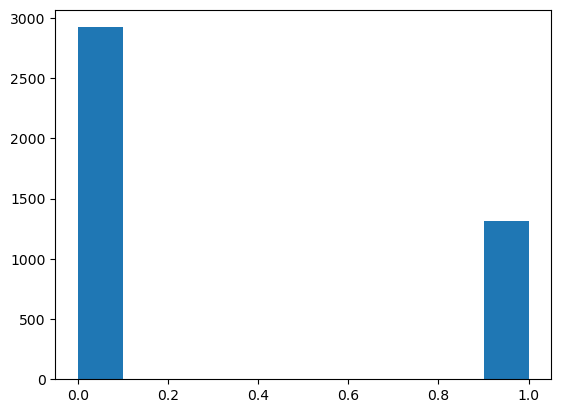

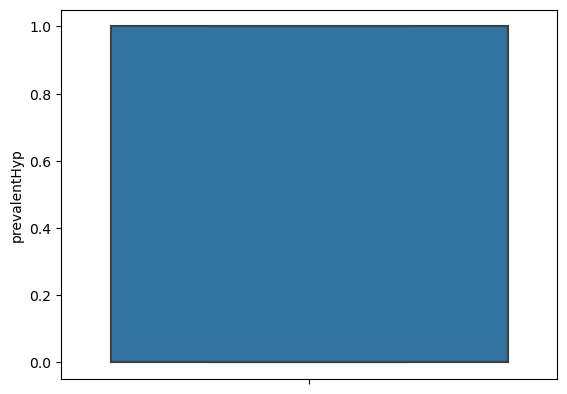

{'missing': 0,
 'min': 0,
 'max': 1,
 'var': 0.21414931250718558,
 'std': 0.46276269567369577,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 0.0,
 'p75': 1.0,
 'p90': 1.0,
 'p99': 1.0,
 'skewness': 0.8192779138124894}

In [344]:
univariate_numerical(data=heart, var="prevalentHyp")

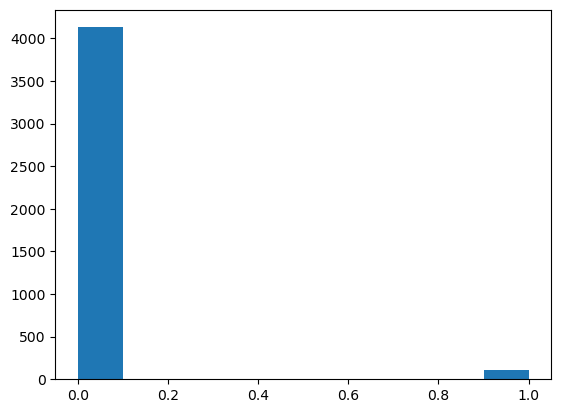

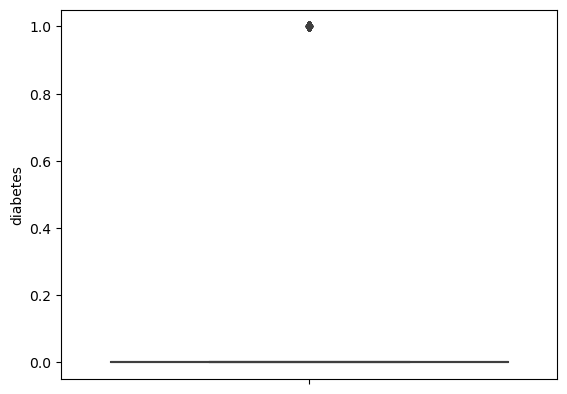

{'missing': 0,
 'min': 0,
 'max': 1,
 'var': 0.02506409133319875,
 'std': 0.15831642786899516,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 0.0,
 'p75': 0.0,
 'p90': 0.0,
 'p99': 1.0,
 'skewness': 5.994377913635468}

In [345]:
univariate_numerical(data=heart, var="diabetes")

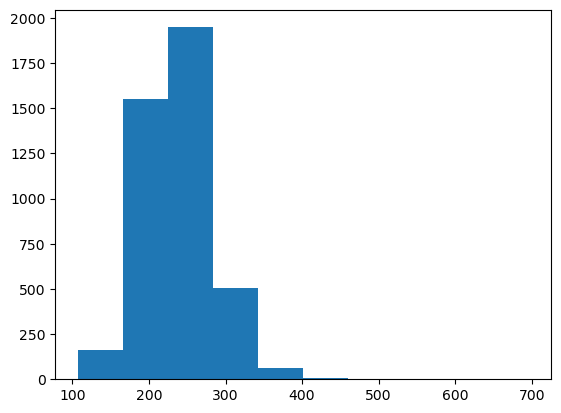

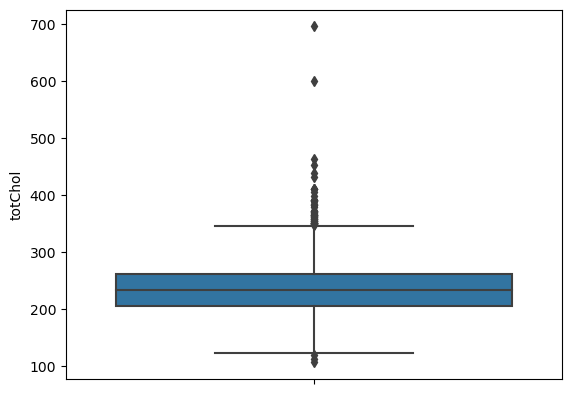

{'missing': 0,
 'min': 107.0,
 'max': 696.0,
 'var': 1964.8344037461347,
 'std': 44.32645264112767,
 'p1': 153.37,
 'p10': 184.0,
 'p25': 206.0,
 'p50': 234.0,
 'p75': 262.0,
 'p90': 292.0,
 'p99': 353.6300000000001,
 'skewness': 0.8766047675685976}

In [346]:
univariate_numerical(data=heart, var="totChol")

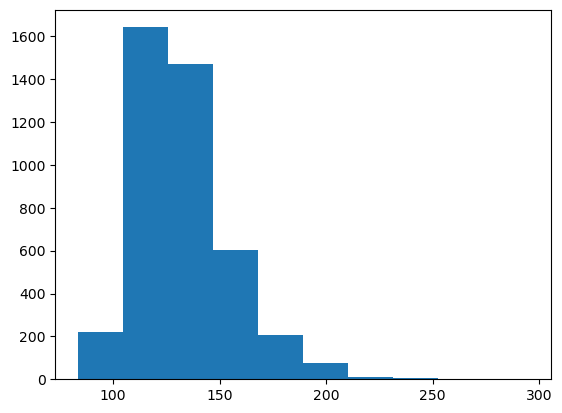

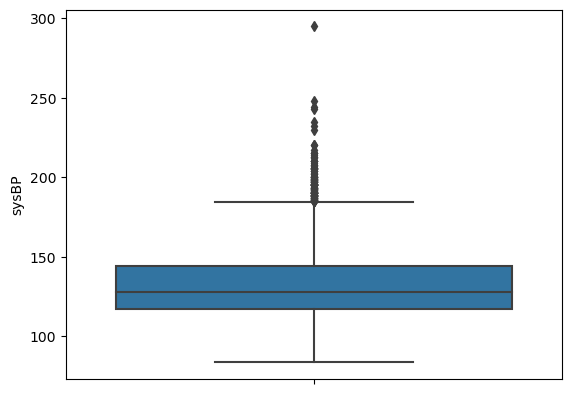

{'missing': 0,
 'min': 83.5,
 'max': 295.0,
 'var': 485.67770367021114,
 'std': 22.038096643544584,
 'p1': 97.0,
 'p10': 108.85000000000002,
 'p25': 117.0,
 'p50': 128.0,
 'p75': 144.0,
 'p90': 162.0,
 'p99': 200.0,
 'skewness': 1.1453621362134168}

In [347]:
univariate_numerical(data=heart, var="sysBP")

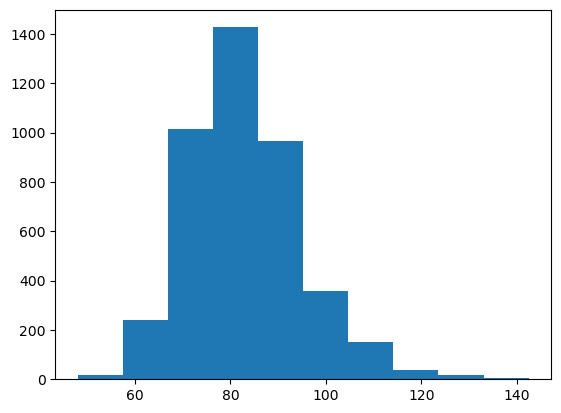

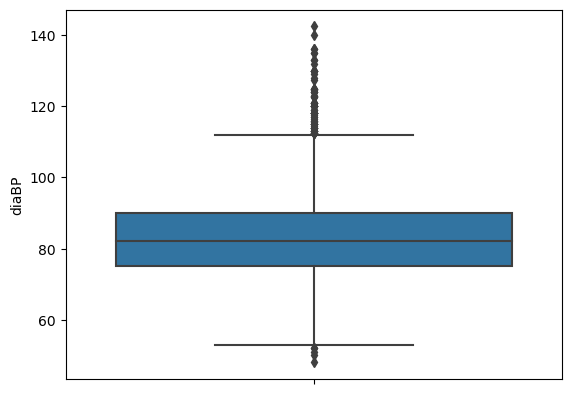

{'missing': 0,
 'min': 48.0,
 'max': 142.5,
 'var': 141.86833819919124,
 'std': 11.91084960022547,
 'p1': 60.0,
 'p10': 69.0,
 'p25': 75.0,
 'p50': 82.0,
 'p75': 89.875,
 'p90': 98.0,
 'p99': 118.0,
 'skewness': 0.7141021839711262}

In [348]:
univariate_numerical(data=heart, var="diaBP")

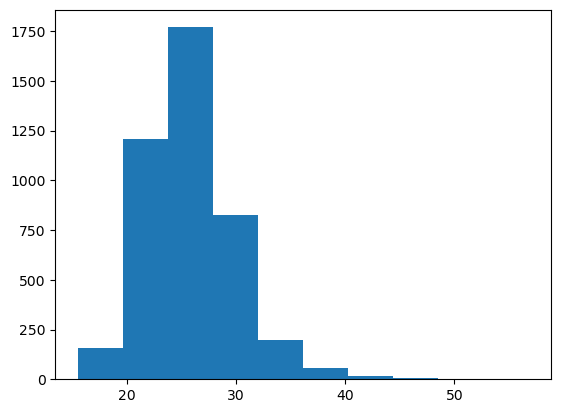

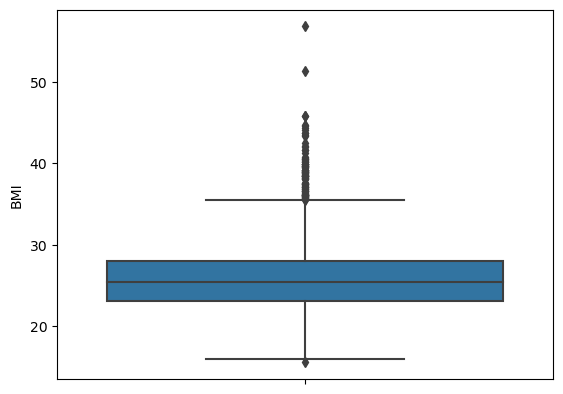

{'missing': 0,
 'min': 15.54,
 'max': 56.8,
 'var': 16.57265468391721,
 'std': 4.070952552403087,
 'p1': 18.1674,
 'p10': 21.1,
 'p25': 23.08,
 'p50': 25.41,
 'p75': 28.0375,
 'p90': 30.763,
 'p99': 38.952600000000004,
 'skewness': 0.9841813825662196}

In [349]:
univariate_numerical(data=heart, var="BMI")

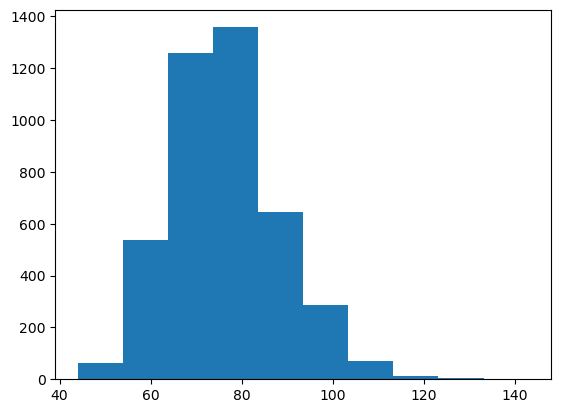

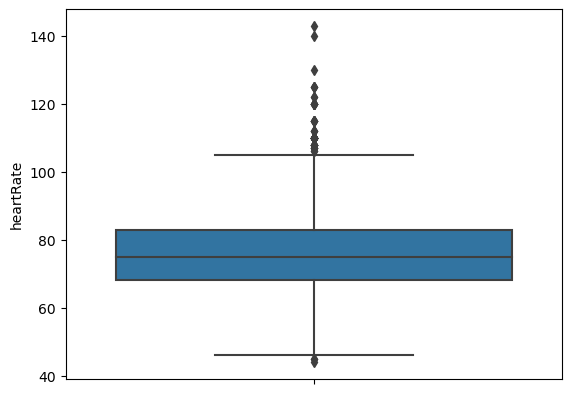

{'missing': 0,
 'min': 44.0,
 'max': 143.0,
 'var': 144.60488267462466,
 'std': 12.02517703298478,
 'p1': 52.0,
 'p10': 60.0,
 'p25': 68.0,
 'p50': 75.0,
 'p75': 83.0,
 'p90': 92.0,
 'p99': 110.0,
 'skewness': 0.6445577291813762}

In [350]:
univariate_numerical(data=heart, var="heartRate")

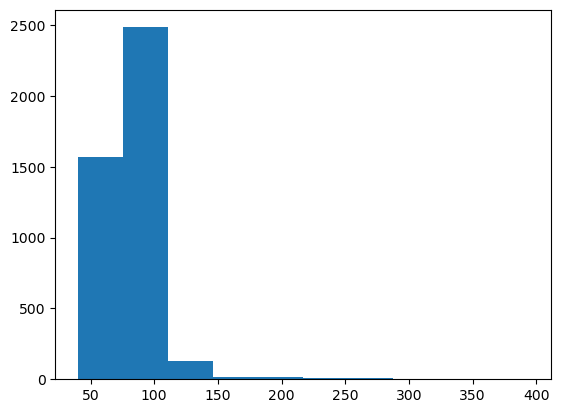

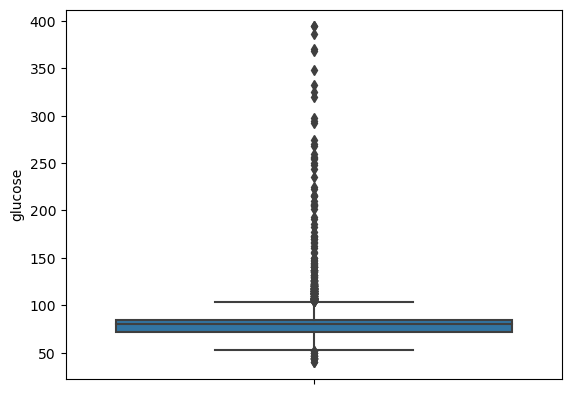

{'missing': 0,
 'min': 40.0,
 'max': 394.0,
 'var': 521.5104423921605,
 'std': 22.836603127263924,
 'p1': 56.0,
 'p10': 66.0,
 'p25': 72.0,
 'p50': 80.0,
 'p75': 85.0,
 'p90': 97.0,
 'p99': 170.0,
 'skewness': 6.518745919355252}

In [351]:
univariate_numerical(data=heart, var="glucose")

###  Visualizing Categorical Features

In [352]:
heart.describe(include="object").T

count unique         top  freq
Gender         4238      2      Female  2419
education      4238      5  uneducated  1720
Heart_ stroke  4238      2          No  3594

In [353]:
cat_var=heart.dtypes[heart.dtypes!='object'].index

for i in cat_var:
    print(" Categorical Variable:",i)
    print(heart[i].value_counts())

 Categorical Variable: age
40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64
 Categorical Variable: currentSmoker
0    2144
1    2094
Name: currentSmoker, dtype: int64
 Categorical Variable: cigsPerDay
0.000000     2144
20.000000     734
30.000000     217
15.000000     210
10.000000     143
9.000000      130
5.000000      121
3.000000      100
40.000000      80
1.000000       67
43.000000      56
25.000000      55
9.003089       29
35.000000      22
2.000000       18
6.000000       18
7.000000       12
8.000000       11
60.000000      11
4.000000        9
18.000000       8
17.000000       7
50.000000       6
23.000000       6
11

In [354]:
cat_var=heart.dtypes[heart.dtypes=='object'].index

for i in cat_var:
    print(" Categorical Variable:",i)
    print(heart[i].value_counts())

 Categorical Variable: Gender
Female    2419
Male      1819
Name: Gender, dtype: int64
 Categorical Variable: education
uneducated       1720
primaryschool    1253
graduate          687
postgraduate      473
None              105
Name: education, dtype: int64
 Categorical Variable: Heart_ stroke
No     3594
yes     644
Name: Heart_ stroke, dtype: int64


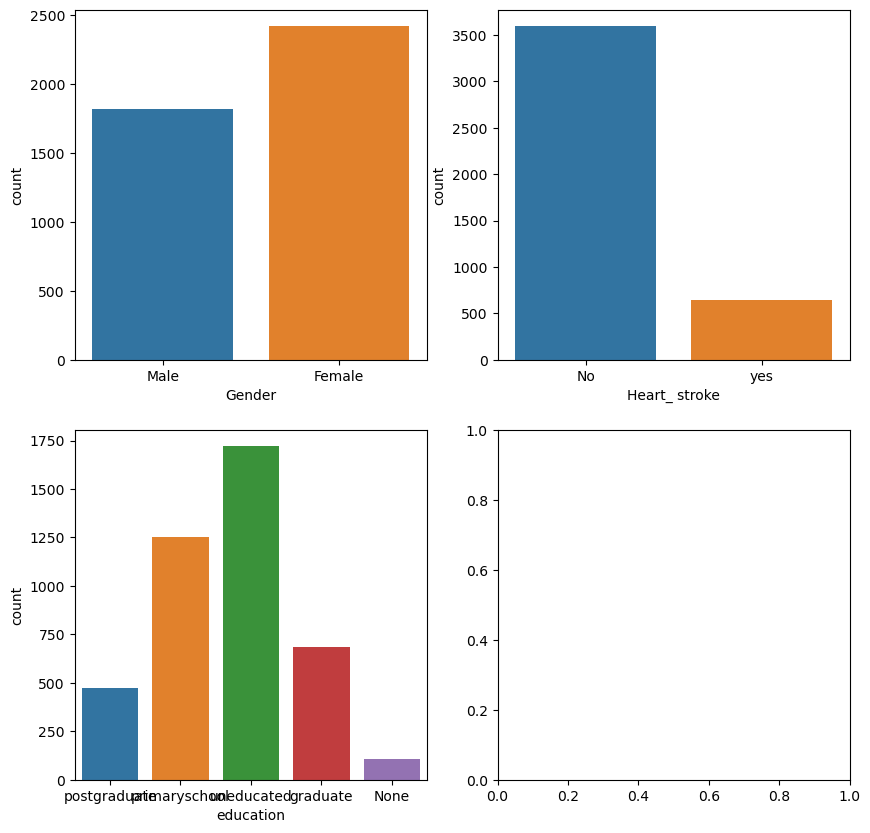

In [355]:
# Visualizing categorical features

fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Gender', data=heart, ax=axarr[0,0])
sns.countplot(x='education', data=heart, ax=axarr[1,0])
sns.countplot(x='Heart_ stroke', data=heart, ax=axarr[0,1])
plt.show()

### Checking betweem Numerical variable to Target Variable

In [356]:
heart.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

### The chi-squared statistic measures the association or independence between the two categorical variables.

In [357]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["age"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=244.9010132715608, pvalue=4.631479891910991e-32, dof=38, expected_freq=array([[8.48041529e-01, 4.24020765e+00, 1.52647475e+01, 3.56177442e+01,
        7.12354884e+01, 7.80198207e+01, 1.22117980e+02, 1.43319018e+02,
        1.61975932e+02, 1.47559226e+02, 1.52647475e+02, 1.34838603e+02,
        1.40774894e+02, 1.37382728e+02, 1.54343558e+02, 1.19573856e+02,
        1.46711185e+02, 1.11941482e+02, 1.18725814e+02, 1.23814063e+02,
        1.26358188e+02, 1.17877773e+02, 1.11941482e+02, 1.22966022e+02,
        1.04309108e+02, 1.04309108e+02, 9.92208589e+01, 1.00916942e+02,
        9.41326097e+01, 9.32845682e+01, 8.39561114e+01, 9.32845682e+01,
        7.88678622e+01, 4.83383672e+01, 3.22255781e+01, 3.81618688e+01,
        1.52647475e+01, 5.93629070e+00, 1.69608306e+00],
       [1.51958471e-01, 7.59792355e-01, 2.73525248e+00, 6.38225578e+00,
        1.27645116e+01, 1.39801793e+01, 2.18820198e+01, 2.56809816e+01,
        2.90240680e+01, 2.64407739e+01, 2.735252

In [358]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["currentSmoker"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=1.4977056527575758, pvalue=0.22102472245944974, dof=1, expected_freq=array([[1818.20103823, 1775.79896177],
       [ 325.79896177,  318.20103823]]))

In [359]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["cigsPerDay"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=41.302267216773465, pvalue=0.1520801298444834, dof=33, expected_freq=array([[1.81820104e+03, 5.68187824e+01, 1.52647475e+01, 8.48041529e+01,
        7.63237376e+00, 1.02613025e+02, 1.52647475e+01, 1.01764983e+01,
        9.32845682e+00, 1.10245399e+02, 2.45932043e+01, 1.21269939e+02,
        4.24020765e+00, 2.54412459e+00, 2.54412459e+00, 1.69608306e+00,
        1.78088721e+02, 2.54412459e+00, 5.93629070e+00, 6.78433223e+00,
        1.69608306e+00, 6.22462482e+02, 5.08824917e+00, 4.66422841e+01,
        8.48041529e-01, 1.84025012e+02, 1.86569136e+01, 8.48041529e-01,
        6.78433223e+01, 4.74903256e+01, 2.54412459e+00, 5.08824917e+00,
        9.32845682e+00, 8.48041529e-01],
       [3.25798962e+02, 1.01812176e+01, 2.73525248e+00, 1.51958471e+01,
        1.36762624e+00, 1.83869750e+01, 2.73525248e+00, 1.82350165e+00,
        1.67154318e+00, 1.97546012e+01, 4.40679566e+00, 2.17300613e+01,
        7.59792355e-01, 4.55875413e-01, 4.55875413e-01, 3.03916942

In [360]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["BPMeds"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=33.198089310460254, pvalue=6.181964422768496e-08, dof=2, expected_freq=array([[3443.89664936,   44.94620104,  105.1571496 ],
       [ 617.10335064,    8.05379896,   18.8428504 ]]))

In [361]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["prevalentHyp"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=132.61099703660688, pvalue=1.0998229381834027e-30, dof=1, expected_freq=array([[2477.97734781, 1116.02265219],
       [ 444.02265219,  199.97734781]]))

In [362]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["diabetes"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=38.44172261466515, pvalue=5.641334407100521e-10, dof=1, expected_freq=array([[3501.56347334,   92.43652666],
       [ 627.43652666,   16.56347334]]))

In [363]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["totChol"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=321.9699262829084, pvalue=0.0010770800265736038, dof=248, expected_freq=array([[ 0.84804153,  0.84804153,  0.84804153,  0.84804153,  0.84804153,
         0.84804153,  0.84804153,  1.69608306,  0.84804153,  1.69608306,
         2.54412459,  1.69608306,  1.69608306,  1.69608306,  1.69608306,
         8.48041529,  5.9362907 ,  2.54412459,  5.08824917, 11.87258141,
         5.08824917,  5.9362907 ,  4.24020765,  7.63237376, 12.72062294,
         5.9362907 ,  4.24020765, 10.17649835,  8.48041529, 21.20103823,
         5.9362907 , 12.72062294,  8.48041529,  7.63237376, 18.65691364,
         5.08824917,  7.63237376, 11.87258141, 10.17649835, 22.89712128,
        14.41670599, 12.72062294, 10.17649835, 14.41670599, 26.2892874 ,
         9.32845682,  9.32845682,  9.32845682, 13.56866446, 29.68145352,
        21.20103823, 13.56866446, 19.50495517, 14.41670599, 36.46578575,
         6.78433223, 18.65691364, 30.52949504, 16.96083058, 40.70599339,
        20.3529967 ,

In [364]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["sysBP"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=507.56079251514734, pvalue=1.8311699893942816e-22, dof=233, expected_freq=array([[ 1.69608306,  0.84804153,  0.84804153,  1.69608306,  0.84804153,
         1.69608306,  1.69608306,  1.69608306,  2.54412459,  5.9362907 ,
         2.54412459, 10.17649835,  3.39216612,  7.63237376,  3.39216612,
        11.87258141,  0.84804153,  6.78433223,  0.84804153, 22.04907975,
         5.08824917, 17.80887211,  0.84804153, 26.2892874 ,  9.32845682,
        16.11278905,  1.69608306, 17.80887211,  1.69608306, 36.46578575,
         4.24020765, 23.74516281,  1.69608306, 32.2255781 , 25.44124587,
        41.55403492,  8.48041529, 31.37753657,  5.9362907 , 81.41198679,
         2.54412459, 46.6422841 ,  6.78433223, 46.6422841 , 37.31382728,
        44.09815951, 11.87258141, 55.12269939,  6.78433223, 75.47569608,
         6.78433223, 60.21094856,  7.63237376, 32.2255781 , 33.07361963,
        52.5785748 , 16.11278905, 57.66682397,  6.78433223, 90.74044361,
        10.1764983

In [365]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["diaBP"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=306.8061015753425, pvalue=1.1900873634702684e-13, dof=145, expected_freq=array([[8.48041529e-01, 8.48041529e-01, 8.48041529e-01, 1.69608306e+00,
        8.48041529e-01, 8.48041529e-01, 2.54412459e+00, 1.69608306e+00,
        5.08824917e+00, 2.54412459e+00, 3.39216612e+00, 9.32845682e+00,
        2.54412459e+00, 2.37451628e+01, 8.48041529e-01, 1.44167060e+01,
        1.69608306e+00, 1.78088721e+01, 6.78433223e+00, 9.32845682e+00,
        4.24020765e+00, 2.12010382e+01, 6.78433223e+00, 3.13775366e+01,
        3.39216612e+00, 2.88334120e+01, 1.69608306e+01, 3.64657857e+01,
        2.28971213e+01, 3.90099103e+01, 5.08824917e+00, 5.25785748e+01,
        2.54412459e+00, 1.14485606e+02, 1.10245399e+01, 6.19070316e+01,
        6.78433223e+00, 7.71717791e+01, 5.17305333e+01, 7.71717791e+01,
        1.52647475e+01, 8.65002360e+01, 1.27206229e+01, 9.15884851e+01,
        1.69608306e+01, 7.88678622e+01, 1.69608306e+01, 6.10589901e+01,
        4.32501180e+01, 9.83728

In [366]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["BMI"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=1454.246771319726, pvalue=0.04246178840911515, dof=1363, expected_freq=array([[0.84804153, 0.84804153, 0.84804153, ..., 0.84804153, 0.84804153,
        0.84804153],
       [0.15195847, 0.15195847, 0.15195847, ..., 0.15195847, 0.15195847,
        0.15195847]]))

In [367]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["heartRate"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=71.08371767345606, pvalue=0.5416815829821524, dof=73, expected_freq=array([[8.48041529e-01, 1.69608306e+00, 8.48041529e-01, 8.48041529e-01,
        4.24020765e+00, 1.86569136e+01, 8.48041529e-01, 1.44167060e+01,
        9.32845682e+00, 1.01764983e+01, 3.05294950e+01, 1.86569136e+01,
        1.52647475e+01, 4.40981595e+01, 4.24020765e+00, 1.95897593e+02,
        5.93629070e+00, 5.34266163e+01, 7.80198207e+01, 4.74903256e+01,
        1.67064181e+02, 6.95394054e+01, 7.88678622e+01, 1.28054271e+02,
        4.24020765e+01, 2.58652666e+02, 3.05294950e+01, 1.88265219e+02,
        5.76668240e+01, 2.62892874e+01, 4.77447381e+02, 8.48041529e-01,
        4.83383672e+01, 4.32501180e+01, 7.46276546e+01, 3.30736196e+01,
        3.26495989e+02, 1.27206229e+01, 6.52991977e+01, 4.32501180e+01,
        2.20490798e+01, 1.92505427e+02, 3.81618688e+01, 2.62892874e+01,
        5.93629070e+01, 7.63237376e+00, 1.45863143e+02, 5.93629070e+00,
        4.07059934e+01, 8.48041529e+

In [368]:
from scipy import stats
figure=pd.crosstab(heart["Heart_ stroke"], heart["glucose"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=272.3060144351523, pvalue=4.2196034781384727e-10, dof=143, expected_freq=array([[1.69608306e+00, 8.48041529e-01, 1.69608306e+00, 3.39216612e+00,
        2.54412459e+00, 8.48041529e-01, 2.54412459e+00, 1.69608306e+00,
        4.24020765e+00, 4.24020765e+00, 1.10245399e+01, 4.24020765e+00,
        1.78088721e+01, 1.69608306e+01, 9.32845682e+00, 5.34266163e+01,
        1.86569136e+01, 3.64657857e+01, 5.34266163e+01, 3.90099103e+01,
        7.20835300e+01, 5.17305333e+01, 9.07404436e+01, 7.88678622e+01,
        5.51226994e+01, 1.28902312e+02, 6.52991977e+01, 9.07404436e+01,
        1.32294479e+02, 1.19573856e+02, 1.63672015e+02, 1.07701274e+02,
        1.41622935e+02, 1.25510146e+02, 8.14119868e+01, 1.28902312e+02,
        5.00344502e+01, 3.29040113e+02, 8.48041529e+01, 1.28054271e+02,
        9.07404436e+01, 1.07701274e+02, 5.25785748e+01, 9.66767343e+01,
        6.27550731e+01, 2.88334120e+01, 6.86913639e+01, 2.45932043e+01,
        3.22255781e+01, 5.08824

### Bivariate Analysis

## Correlation Relationship

In [369]:
heart.corr()

C:\Users\amrit\AppData\Local\Temp\ipykernel_23440\1516287138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heart.corr()


age  currentSmoker  cigsPerDay    BPMeds  prevalentHyp  \
age            1.000000      -0.213748   -0.192366  0.121980      0.307194   
currentSmoker -0.213748       1.000000    0.766970 -0.048632     -0.103260   
cigsPerDay    -0.192366       0.766970    1.000000 -0.045826     -0.065947   
BPMeds         0.121980      -0.048632   -0.045826  1.000000      0.259243   
prevalentHyp   0.307194      -0.103260   -0.065947  0.259243      1.000000   
diabetes       0.101258      -0.044295   -0.037063  0.051571      0.077808   
totChol        0.260270      -0.046285   -0.026025  0.078909      0.163041   
sysBP          0.394302      -0.130230   -0.088505  0.252047      0.696755   
diaBP          0.206104      -0.107746   -0.056391  0.192490      0.615751   
BMI            0.135283      -0.167276   -0.092453  0.099552      0.300572   
heartRate     -0.012819       0.062348    0.074851  0.015175      0.147222   
glucose        0.116850      -0.054157   -0.056088  0.048905      0.082924   

               diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
age            0.101258  0.260270  0.394302  0.206104  0.135283  -0.012819   
currentSmoker -0.044295 -0.046285 -0.130230 -0.107746 -0.167276   0.062348   
cigsPerDay    -0.037063 -0.026025 -0.088505 -0.056391 -0.092453   0.074851   
BPMeds         0.051571  0.078909  0.252047  0.192490  0.099552   0.015175   
prevalentHyp   0.077808  0.163041  0.696755  0.615751  0.300572   0.147222   
diabetes       1.000000  0.040092  0.111283  0.050329  0.086250   0.048993   
totChol        0.040092  1.000000  0.207609  0.163903  0.114789   0.090676   
sysBP          0.111283  0.207609  1.000000  0.784002  0.325247   0.182174   
diaBP          0.050329  0.163903  0.784002  1.000000  0.376544   0.181246   
BMI            0.086250  0.114789  0.325247  0.376544  1.000000   0.067544   
heartRate      0.048993  0.090676  0.182174  0.181246  0.067544   1.000000   
glucose        0.605705  0.044583  0.134608  0.058647  0.082109   0.089341   

                glucose  
age            0.116850  
currentSmoker -0.054157  
cigsPerDay    -0.056088  
BPMeds         0.048905  
prevalentHyp   0.082924  
diabetes       0.605705  
totChol        0.044583  
sysBP          0.134608  
diaBP          0.058647  
BMI            0.082109  
heartRate      0.089341  
glucose        1.000000

In [370]:
d=heart.corr()
def mylight(x):
    color="yellow" if abs(x)>=.6 else ""
    return "background-color: {}".format(color)

C:\Users\amrit\AppData\Local\Temp\ipykernel_23440\3236583266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d=heart.corr()


In [371]:
d.style.applymap(mylight)

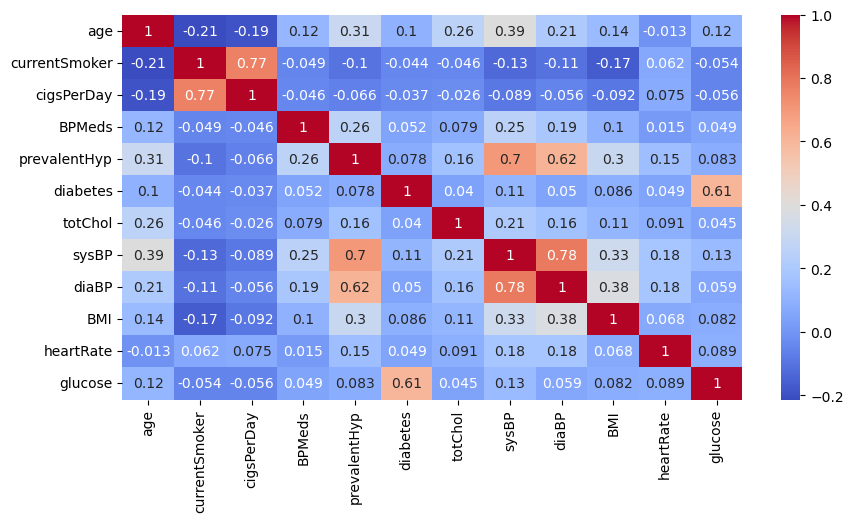

In [372]:
plt.figure(figsize=(10,5))
sns.heatmap(d, annot=True, cmap="coolwarm")
plt.show()

### Correlation between currentSmoker and cigsPerDay = 0.77% aur sysBP and diaBP = 0.78%

## Labal Encoding

In [373]:
heart["Heart_stroker"]=heart["Heart_ stroke"].map({"yes":1, "No":0})
heart.drop(columns=["Heart_ stroke"], inplace=True)
heart

Gender  age      education  currentSmoker  cigsPerDay   BPMeds  \
0       Male   39   postgraduate              0         0.0  0.00000   
1     Female   46  primaryschool              0         0.0  0.00000   
2       Male   48     uneducated              1        20.0  0.00000   
3     Female   61       graduate              1        30.0  0.00000   
4     Female   46       graduate              1        23.0  0.00000   
...      ...  ...            ...            ...         ...      ...   
4233    Male   50     uneducated              1         1.0  0.00000   
4234    Male   51       graduate              1        43.0  0.00000   
4235  Female   48  primaryschool              1        20.0  0.02963   
4236  Female   44     uneducated              1        15.0  0.00000   
4237  Female   52  primaryschool              0         0.0  0.00000   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   
3                1         0    225.0  150.0   95.0  28.58       65.0   
4                0         0    285.0  130.0   84.0  23.10       85.0   
...            ...       ...      ...    ...    ...    ...        ...   
4233             1         0    313.0  179.0   92.0  25.97       66.0   
4234             0         0    207.0  126.5   80.0  19.71       65.0   
4235             0         0    248.0  131.0   72.0  22.00       84.0   
4236             0         0    210.0  126.5   87.0  19.16       86.0   
4237             0         0    269.0  133.5   83.0  21.47       80.0   

         glucose  Heart_stroker  
0      77.000000              0  
1      76.000000              0  
2      70.000000              0  
3     103.000000              1  
4      85.000000              0  
...          ...            ...  
4233   86.000000              1  
4234   68.000000              0  
4235   86.000000              0  
4236   81.966753              0  
4237  107.000000              0  

[4238 rows x 15 columns]

### Dummies Creating

In [374]:
heart1=pd.get_dummies(heart, columns=["Gender","age", "education","currentSmoker","cigsPerDay", "BPMeds", "diabetes", 
                                      "totChol","sysBP", "diaBP", "BMI","heartRate", "glucose"],
              drop_first=True)

### Pre-processing the Data¶
Since we have already explored the data for a while, we can start pre-processing it. For now, let's use all of the features for the class prediction. After obtaining a first model, a baseline, we can then remove some of the highly correlated columns and compare it to the baseline.

The feature columns will be our X data and the class column, our y target data:

### Model Development

In [375]:
X=heart1.drop(columns=["Heart_stroker"])
y=heart1["Heart_stroker"]

### Scaling Data
Once we have our train and test sets ready, we can proceed to scale the data with the Scikit-Learn StandardScaler object (or other scalers provided by the library). To avoid leakage, the scaler is fitted to the X_train data and the train values are then used to scale - or transform - both the train and test data:

In [376]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [377]:
X = scaler.fit_transform(X)

### Implementing the Logistic Regression Model¶
The hard part is done! Preprocessing is usually more difficult than model development, when it comes to using libraries like Scikit-Learn, which have streamlined the application of ML models to just a couple of lines.

First, we import the LogisticRegression class and instantiate it, creating a LogisticRegression object:

Second, we fit our train data to the logreg model with the fit() method.

In [466]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

 Split Data into Training and Testing Sets

In [467]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=0)

### Implementing the Logistic Regression Model
The hard part is done! Preprocessing is usually more difficult than model development, when it comes to using libraries like Scikit-Learn, which have streamlined the application of ML models to just a couple of lines.

First, we import the LogisticRegression class and instantiate it, creating a LogisticRegression object:

Second, we fit our train data to the Log_Model with the fit() method.

In [468]:
Log_Model=LogisticRegression(max_iter=10000)

In [469]:
Log_Model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

### Create a KFold Cross Validation

In [470]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [471]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [472]:
# Perform cross-validation on the model
scores = cross_val_score(Log_Model, X, y, cv=kf)

In [473]:
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.76179245 0.74292453 0.75943396 0.73553719 0.729634  ]


In [474]:
# Calculate and print the mean score
mean_score = scores.mean()
print("Mean Score:", mean_score)

Mean Score: 0.7458644271680293


In [475]:
print("Train score", Log_Model.score(X_train, y_train))
print("Test score", Log_Model.score(X_test, y_test))

Train score 1.0
Test score 0.7617924528301887


In [445]:
pred_train=Log_Model.predict(X_train)
pred_test=Log_Model.predict(X_test)

In [446]:
pred_train
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [447]:
pd.crosstab(y_train, pred_train)

col_0             0    1
Heart_stroker           
0              2520    0
1                 0  446

In [448]:
metrics.confusion_matrix(y_train, pred_train)

array([[2520,    0],
       [   0,  446]], dtype=int64)

### Evaluating the Model with Classification Reports
The step is to see how the model performs on test data. We can import Scikit-Learn classification_report() and pass our y_train and pred_train as arguments. After that, we can print out its response.


The classification report contains the most used classification metrics, such as precision, recall, f1-score, and accuracy.

In [449]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00       446

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



 The step is to see how the model performs on test data. We can import Scikit-Learn classification_report() and pass our y_test and pred_test as arguments. After that, we can print out its response.

In [450]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1074
           1       0.23      0.22      0.23       198

    accuracy                           0.76      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.76      0.76      0.76      1272



In [451]:
train_prob=pd.DataFrame(Log_Model.predict_proba(X_train),columns=["Prob_0", "Prob_1"])
new_predict=np.where(train_prob["Prob_1"]>=.5,1,0)

In [452]:
print(metrics.classification_report(y_train, new_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00       446

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



In [453]:
test_prob=pd.DataFrame(Log_Model.predict_proba(X_test),columns=["Prob_0", "Prob_1"])
new_predict=np.where(test_prob["Prob_1"]>=.3,1,0)

In [454]:
print(metrics.classification_report(y_test, new_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1074
           1       0.23      0.27      0.25       198

    accuracy                           0.75      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.76      0.75      0.76      1272



### Area Under ROC Curve (AUC)
This is a metric used only for binary classification problems. The area under the curve represents the model's ability to properly discriminate between negative and positive examples, between one class or another.

A 1.00, all of the area falling under the curve, represents a perfect classifier. This means that an AUC of 0.5 is basically as good as randomly guessing. The ROC curve is calculated with regards to sensitivity (true positive rate/recall) and specificity (true negative rate). You can read more about these calculations at this ROC curve article.

In [455]:
from sklearn.metrics import roc_curve, auc

In [456]:
def roc_curve(y, prob_1):
    fpr, tpr, threshold=metrics.roc_curve(y, prob_1)
    aucc=metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label="AUC = %0.2f"%(aucc))
    plt.title("ROC(Receiver Operator Charactersitcs) curve")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive Rate")
    plt.legend()
    plt.show()

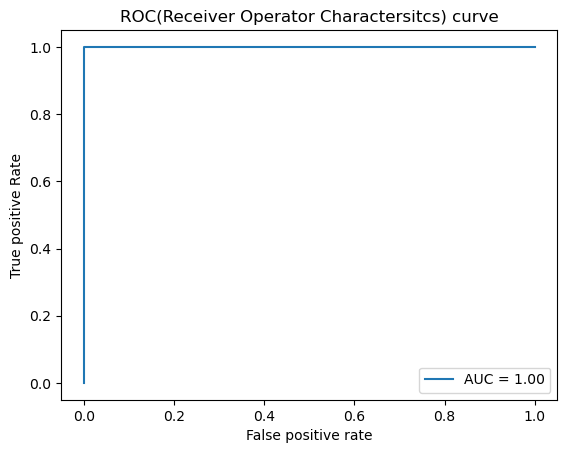

In [457]:
roc_curve(y_train, prob_1=train_prob["Prob_1"])

In [458]:
fpr, tpr, threshold=metrics.roc_curve(y_train, train_prob["Prob_1"])

### Evaluating the Model with Classification Reports
The third step is to see how the model performs on test data. We can import Scikit-Learn classification_report() and pass our y_test and y_pred as arguments. After that, we can print out its response.

The classification report contains the most used classification metrics, such as precision, recall, f1-score, and accuracy.

Precision: to understand what correct prediction values were considered correct by our classifier. Precision will divide those true positives values by anything that was predicted as a positive.

Recall: to understand how many of the true positives were identified by our classifier. The recall is calculated by dividing the true positives by anything that should have been predicted as positive.

F1 score: is the balanced or harmonic mean of precision and recall. The lowest value is 0 and the highest is 1. When f1-score is equal to 1, it means all classes were correctly predicted - this is a very hard score to obtain with real data.

Accuracy: describes how many predictions our classifier got right. The lowest accuracy value is 0 and the highest is 1. That value is usually multiplied by 100 to obtain a percentage.



### Evaluating the Model with a Confusion Matrix¶
Let's calculate and then plot the confusion matrix. After doing that, we can understand each part of it. To plot the confusion matrix, we'll use Scikit-Learn confusion_matrix(), which we'll import from the metrics module.

The confusion matrix is easier to visualize using a Seaborn heatmap(). So, after generating it, we will pass our confusion matrix as an argument for the heatmap:

In [459]:
y_pred = Log_Model.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)

Score = accuracy_score(y_test,y_pred)

Report = classification_report(y_test,y_pred)

In [460]:
# Model Classification Report for Training data
pred_train=Log_Model.predict(X_train)
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2520
           1       1.00      1.00      1.00       446

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



In [461]:
# Model Classification Report for Test data
print(Report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1074
           1       0.23      0.22      0.23       198

    accuracy                           0.76      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.76      0.76      0.76      1272



In [462]:
# Model Training data score
print("Train score", Log_Model.score(X_train, y_train))
print("Test score", Log_Model.score(X_test, y_test))

Train score 1.0
Test score 0.7617924528301887


In [463]:
# Confusion Matrix
print(cfm)

[[925 149]
 [154  44]]


In [464]:
print(Score)

0.7617924528301887


### Logistic Regression accuracy score is 76%

# Decision Tree Model

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [126]:
X=heart1.drop(columns=["Heart_stroker"])
y=heart1["Heart_stroker"]

 Split Data into Training and Testing Sets

In [127]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

### Implementing the Decision Tree Model
The hard part is done! Preprocessing is usually more difficult than model development, when it comes to using libraries like Scikit-Learn, which have streamlined the application of ML models to just a couple of lines.

First, we import the DecisionTreeRegression class and instantiate it, creating a DecisionTreeRegression object:

Second, we fit our train data to the dt1 with the fit() method.

In [129]:
from sklearn.tree import DecisionTreeRegressor


dt1=DecisionTreeRegressor(random_state=88)
dt1.fit(X, y)

pd.DataFrame({"Features": X.columns, "Imp": dt1.feature_importances_}).sort_values(by=["Imp"], ascending=False)

Features       Imp
0                prevalentHyp  0.031543
42    education_primaryschool  0.012116
1                 Gender_Male  0.010270
65            cigsPerDay_20.0  0.008723
44            currentSmoker_1  0.007518
...                       ...       ...
885                 BMI_20.59  0.000000
884                 BMI_20.57  0.000000
883                 BMI_20.56  0.000000
882                 BMI_20.55  0.000000
2285            glucose_394.0  0.000000

[2286 rows x 2 columns]

In [130]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=100, min_samples_leaf=15)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8516224188790561
Test score : 0.8349056603773585


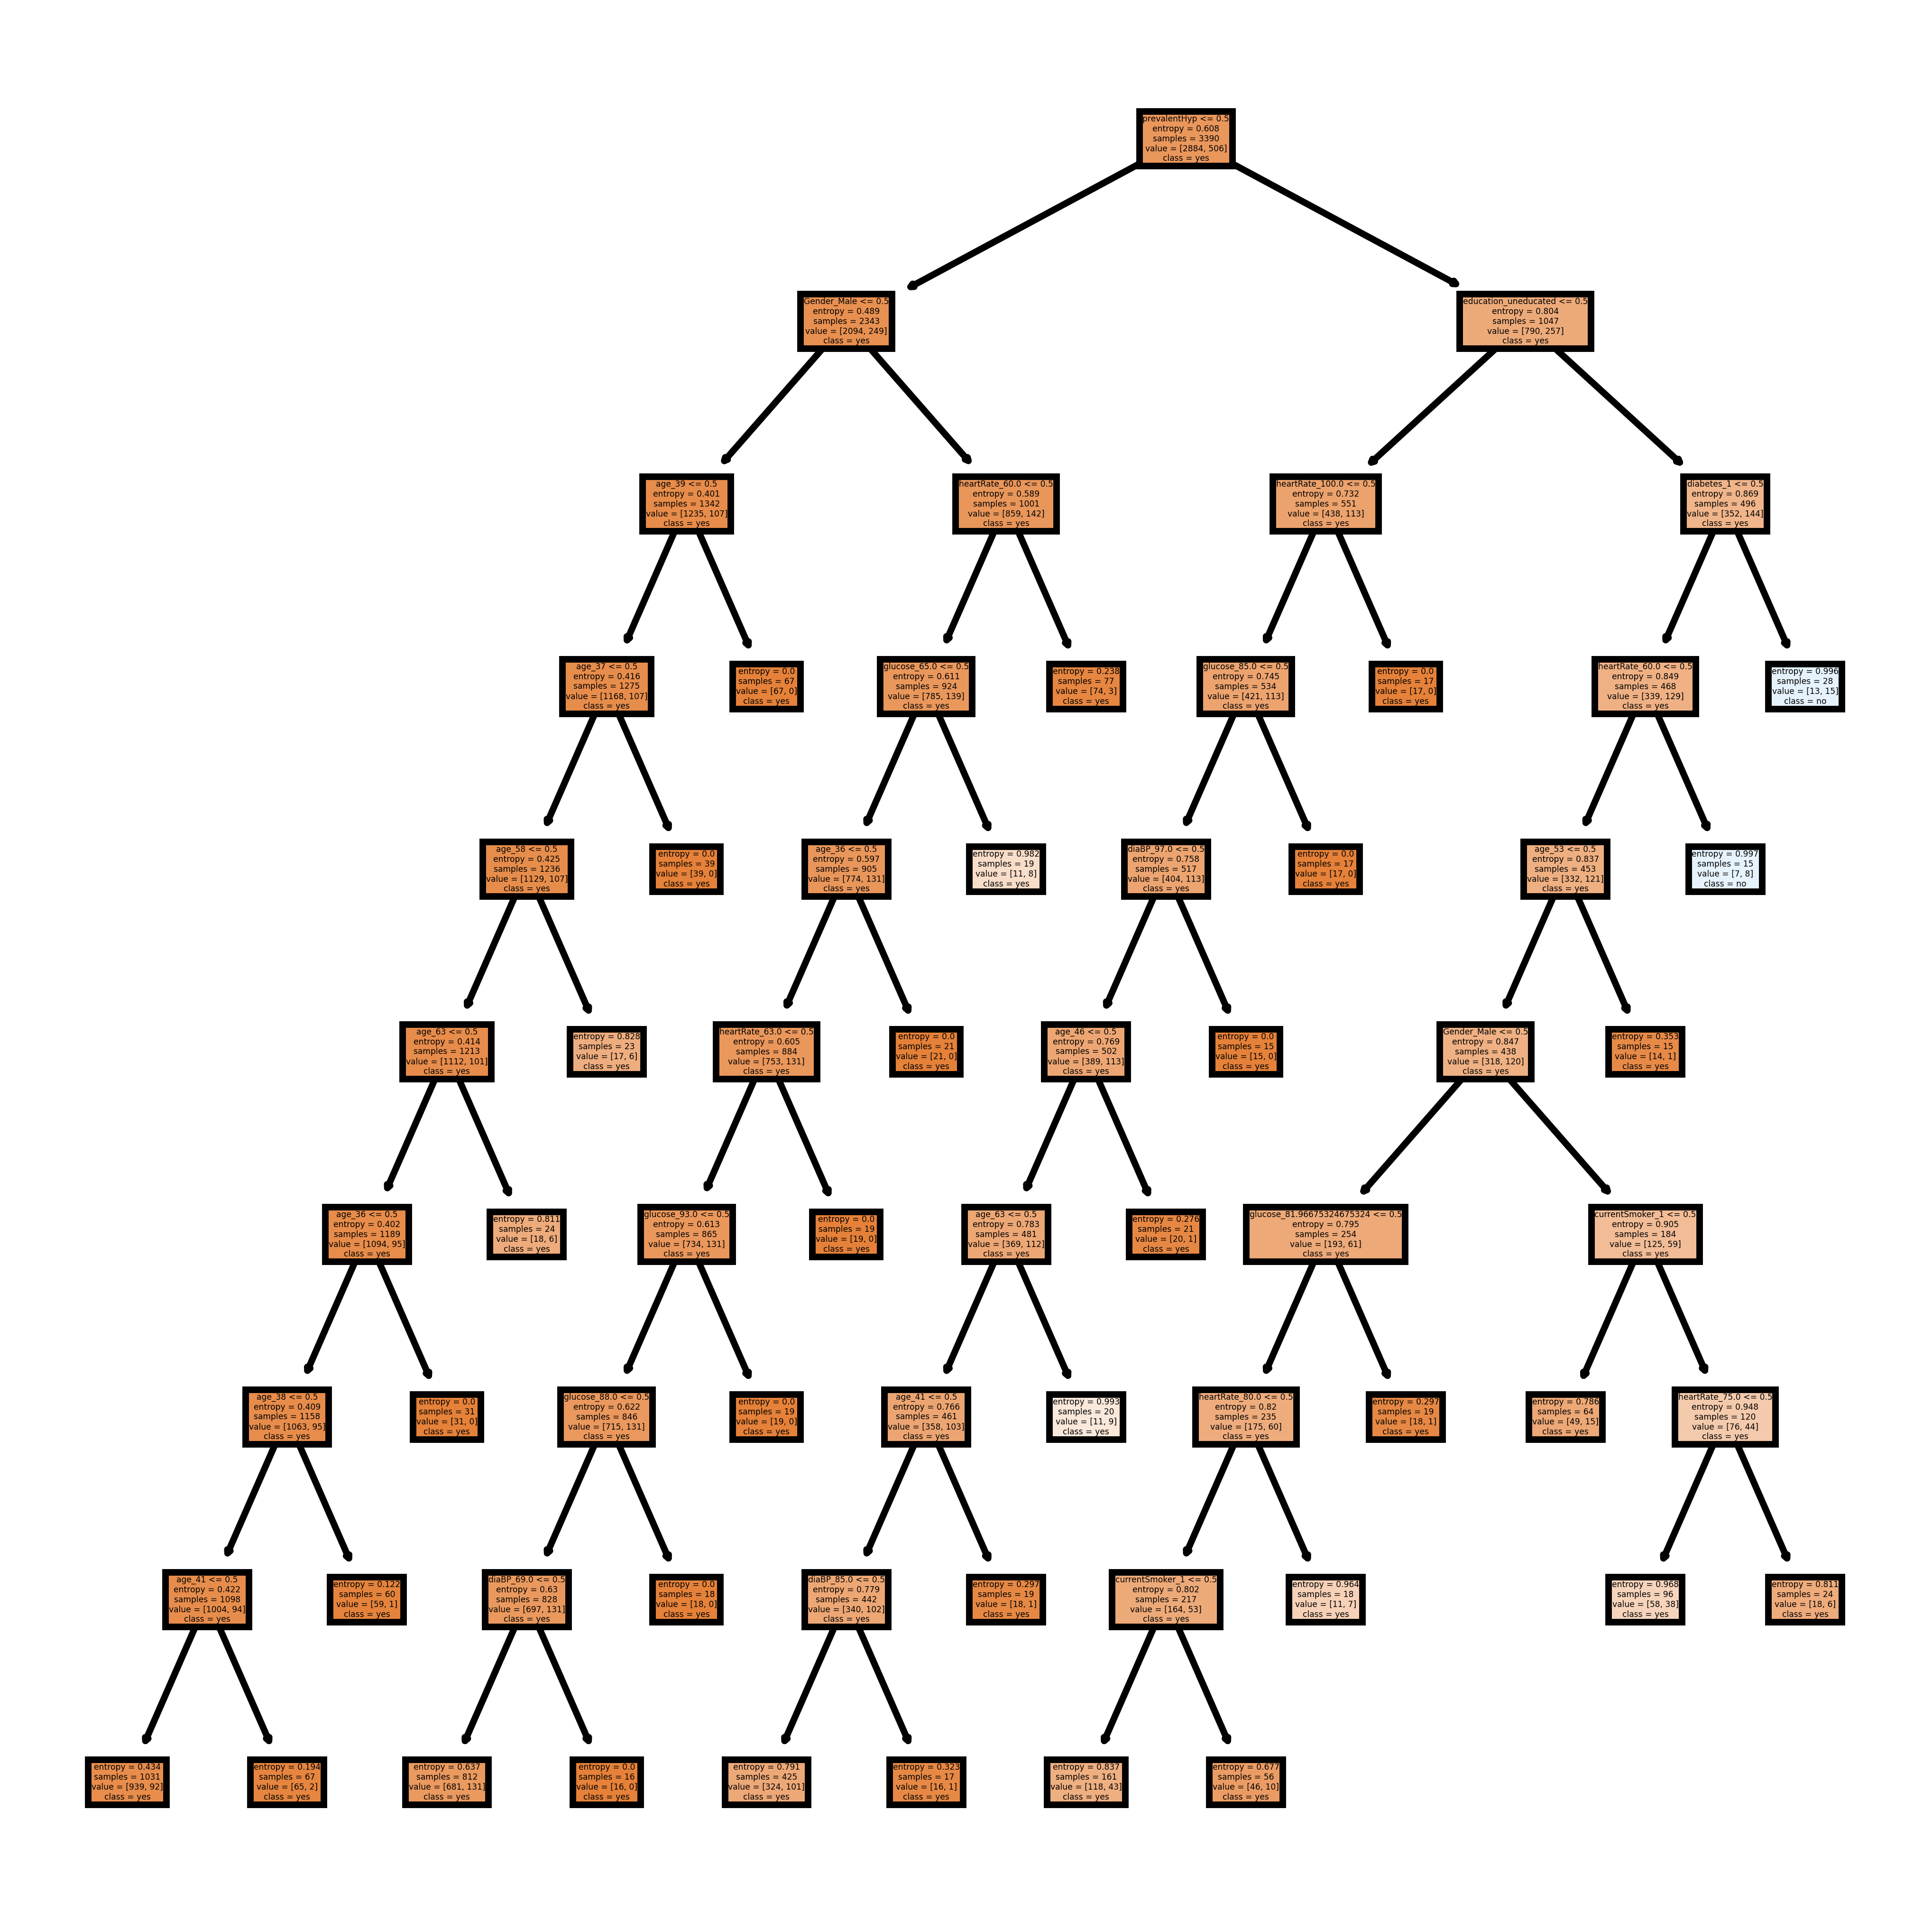

In [131]:
from sklearn.tree import plot_tree
from sklearn import tree

fn=X_train.columns

cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)

dt_plot=plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [133]:
dt1=DecisionTreeClassifier(max_depth=11, criterion="entropy")
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.8722713864306785
Test accuracy: 0.8278301886792453


### Grid Search
The purpose of this code is to systematically explore different combinations of hyperparameters for the Decision Tree Classifier, cross-validating each combination, and finding the best set of hyperparameters that yields the best performance on the provided training data

In [134]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[10,50,100,150], 
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[10,50,100, 150,200]
             }

tr = DecisionTreeClassifier(random_state=88)

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=True, n_jobs=-1)

gsearch.fit(X_train, y_train) 

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=88),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [10, 50, 100, 150, 200],
                         'min_samples_split': [10, 50, 100, 150]},
             verbose=True)

In [135]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 10}

In [136]:
gsearch.best_score_

0.8507374631268435

In [137]:
dt3=DecisionTreeClassifier(max_depth=6, criterion="gini", 
                           min_samples_split=10,
                          min_samples_leaf= 10)
dt3.fit(X_train, y_train)

print("Train accuracy:", dt3.score(X_train,y_train))

print("Test accuracy:", dt3.score(X_test,y_test))

Train accuracy: 0.8548672566371681
Test accuracy: 0.8266509433962265


### Selecting Important Features

In [138]:
X_train.columns
dt3.feature_importances_
imp=pd.DataFrame({"Var":X_train.columns, "Imp":dt2.feature_importances_}).sort_values(by=["Imp"], ascending=False)
imp

Var       Imp
0             prevalentHyp  0.394010
1              Gender_Male  0.093105
8                   age_39  0.075136
43    education_uneducated  0.056162
2084        heartRate_60.0  0.036422
...                    ...       ...
766              BMI_18.67  0.000000
765              BMI_18.65  0.000000
764              BMI_18.64  0.000000
763              BMI_18.63  0.000000
2285         glucose_394.0  0.000000

[2286 rows x 2 columns]

In [139]:
# Model Evaluation
pred_train=dt3.predict(X_train)   
pred_test=dt3.predict(X_test)

In [140]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2884
           1       0.59      0.09      0.16       506

    accuracy                           0.85      3390
   macro avg       0.72      0.54      0.54      3390
weighted avg       0.82      0.85      0.81      3390



In [141]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       710
           1       0.29      0.04      0.08       138

    accuracy                           0.83       848
   macro avg       0.56      0.51      0.49       848
weighted avg       0.75      0.83      0.77       848



### Decision Tree model accuracy is 83%

# Random Forese Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
X=heart1.drop(columns=["Heart_stroker"])
y=heart1["Heart_stroker"]

 Split Data into Training and Testing Sets

In [144]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

### Implementing the Random Forest Model
The hard part is done! Preprocessing is usually more difficult than model development, when it comes to using libraries like Scikit-Learn, which have streamlined the application of ML models to just a couple of lines.

First, we import the RandomForestClassifier class and instantiate it, creating a RandomForestClassifier object:

Second, we fit our train data to the rf1 with the fit() method.

In [145]:
rf1=RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [146]:
rf1.score(X_train, y_train)

1.0

In [147]:
rf1.score(X_test, y_test)

0.8443396226415094

In [148]:
print("Train score ", rf1.score(X_train, y_train))
print("Test score", rf1.score(X_test, y_test))

Train score  1.0
Test score 0.8443396226415094


In [149]:
import time 
st=time.time()


rf2=RandomForestClassifier(n_estimators=50, random_state=88, max_depth=12)
rf2.fit(X_train, y_train)
print("Train score ", rf2.score(X_train, y_train))
print("Test Score", rf2.score(X_test, y_test))
et=time.time()

print("total time", et-st)

Train score  0.8496291301416049
Test Score 0.8443396226415094
total time 0.6026365756988525


### Hyperparameter tuning

In [152]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [153]:
parameters={"n_estimators":[400,250,100],
            "criterion": ["gini", "entropy"],
            "max_depth" :[8,10,12],
            "min_samples_split":[10,50,100,200],
            "min_samples_leaf":[10,20,50,100],
            "max_features":['sqrt', "log2"],
            "bootstrap" : [True],
            "max_samples":[.7]}

In [154]:
rf_gs=RandomForestClassifier(random_state=0)

g_rf=GridSearchCV(estimator=rf_gs, param_grid=parameters,cv=5, verbose=2, n_jobs=1)
g_rf.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, max_samples=0

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12],
                         'max_features': ['sqrt', 'log2'], 'max_samples': [0.7],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'min_samples_split': [10, 50, 100, 200],
                         'n_estimators': [400, 250, 100]},
             verbose=2)

In [155]:
g_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_samples': 0.7,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 400}

In [156]:
g_rf.best_score_

0.8496295160713373

In [157]:
rf3=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=10, max_features="sqrt", min_samples_leaf= 8,
                           min_samples_split= 8, bootstrap=False)
rf3.fit(X_train, y_train)
print("Train score ", rf3.score(X_train, y_train))
print("Test Score", rf3.score(X_test, y_test))

Train score  0.8496291301416049
Test Score 0.8443396226415094


In [158]:
# Training the model 
rf3_fit = rf3.fit(X_train, y_train) 

# Predicting the quality
y_pred = rf3_fit.predict(X_test) 

In [159]:
# Checking the accuracy of the model
accuracy_score(y_test, y_pred)

0.8443396226415094

In [160]:
# Predicting the probabilities of wine being of high quality
y_proba = rf3_fit.predict_proba(X_test)

In [161]:
# Visualizing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[1074    0]
 [ 198    0]]


### The accuracy with Random Forest Model is 84%

# SVM: Support Vector Machine

In [164]:
from sklearn.svm import SVC

 Split Data into Training and Testing Sets

In [165]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

## Implementing the SVM Model
The hard part is done! Preprocessing is usually more difficult than model development, when it comes to using libraries like Scikit-Learn, which have streamlined the application of ML models to just a couple of lines.

First, we import the SupportVectorMachine class and instantiate it, creating a SupportVectorMachine object:

Second, we fit our train data to the Support_V with the fit() method.

In [166]:
Support_V = SVC(kernel='linear', C=1.0)  
Support_V.fit(X_train, y_train)

SVC(kernel='linear')

In [167]:
Support_V.score(X_train, y_train)

0.9430209035738368

In [168]:
Support_V.score(X_test, y_test)

0.8066037735849056

In [169]:
print("Train score ", Support_V.score(X_train, y_train))
print("Train score ", Support_V.score(X_test, y_test))

Train score  0.9430209035738368
Train score  0.8066037735849056


              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1074
           1       0.00      0.00      0.00       198

    accuracy                           0.84      1272
   macro avg       0.42      0.50      0.46      1272
weighted avg       0.71      0.84      0.77      1272



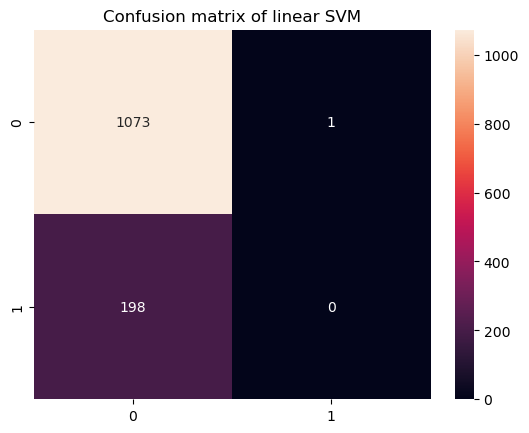

In [271]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2520
           1       0.98      0.63      0.77       446

    accuracy                           0.94      2966
   macro avg       0.96      0.82      0.87      2966
weighted avg       0.95      0.94      0.94      2966



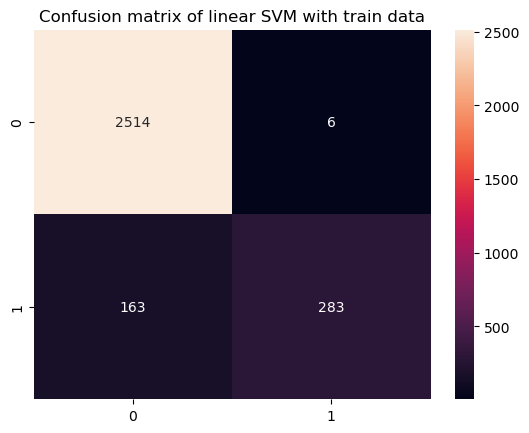

In [171]:
y_pred_train = Support_V.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

# K-Nearest Neighbors Algorithms

In [172]:
from sklearn.neighbors import KNeighborsClassifier

 Split Data into Training and Testing Sets

In [173]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

### Implementing the KNeighborsClassifier Model¶
The hard part is done! Preprocessing is usually more difficult than model development, when it comes to using libraries like Scikit-Learn, which have streamlined the application of ML models to just a couple of lines.

First, we import the KNeighbousClassifier class and instantiate it, creating a KNeighbousClassifier object:

Second, we fit our train data to the Classifier with the fit() method.

In [174]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [175]:
y_pred = classifier.predict(X_test)

In [176]:
classifier.score(X_test, y_test)

0.8364779874213837

In [177]:
print("Train score", classifier.score(X_train, y_train))
print("Test score", classifier.score(X_test, y_test))

Train score 0.8648010788941335
Test score 0.8364779874213837


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1074
           1       0.27      0.03      0.05       198

    accuracy                           0.84      1272
   macro avg       0.56      0.51      0.48      1272
weighted avg       0.76      0.84      0.78      1272



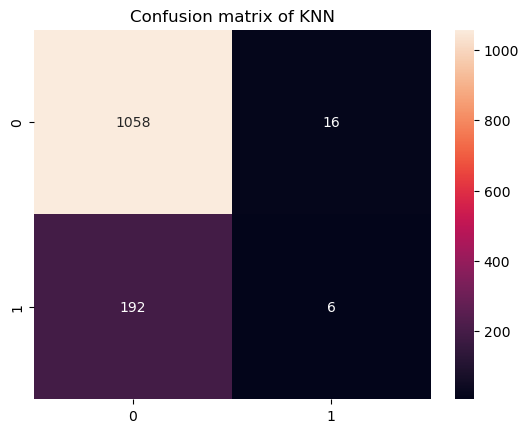

In [178]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of KNN') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2520
           1       0.75      0.15      0.25       446

    accuracy                           0.86      2966
   macro avg       0.81      0.57      0.59      2966
weighted avg       0.85      0.86      0.82      2966



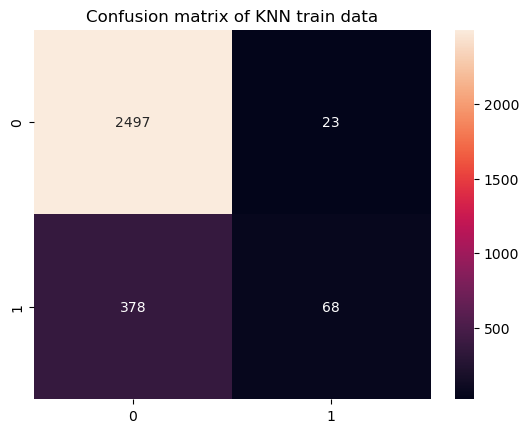

In [179]:
y_pred_trains = classifier.predict(X_train)

cm_trains = confusion_matrix(y_train,y_pred_trains)
sns.heatmap(cm_trains, annot=True, fmt='d').set_title('Confusion matrix of KNN train data')

print(classification_report(y_train,y_pred_trains))

Text(0, 0.5, 'F1 Score')

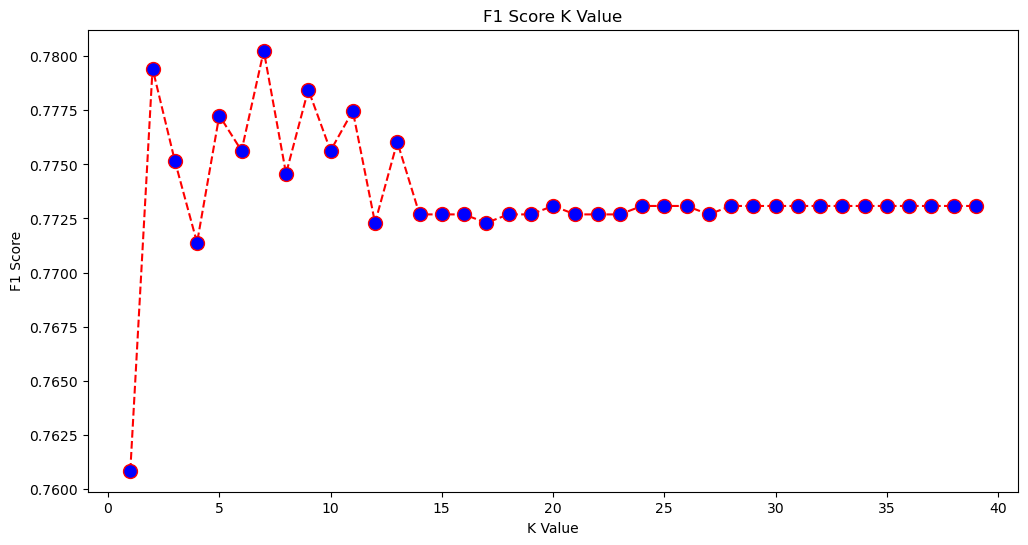

In [180]:
from sklearn.metrics import f1_score

f1s = []

for i in range(1, 40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_test) 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [181]:
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1074
           1       0.00      0.00      0.00       198

    accuracy                           0.84      1272
   macro avg       0.42      0.50      0.46      1272
weighted avg       0.71      0.84      0.77      1272



## All Train, Test Accuracy Reports through visualization.

In [182]:
data = {'Models' : ["Logistic_Regression_Model", "Decision_Tree_Model", "Random_Forest_Model", "Support_Vector_Machine", "K-Nearest_Neighbours"],
'Train' : [1.00, 0.85, 0.84, 0.94, 0.86],
'Test' : [0.76, 0.83, 0.84, 0.80, 0.83]}

In [183]:
df = pd.DataFrame(data)

In [184]:
df

Models  Train  Test
0  Logistic_Regression_Model   1.00  0.76
1        Decision_Tree_Model   0.85  0.83
2        Random_Forest_Model   0.84  0.84
3     Support_Vector_Machine   0.94  0.80
4       K-Nearest_Neighbours   0.86  0.83

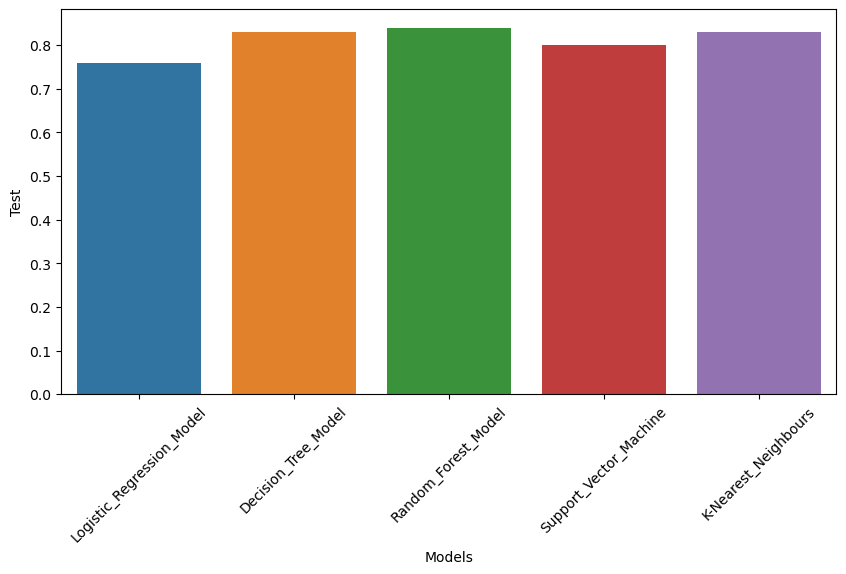

In [185]:
sns.barplot(x='Models', y='Test', data=df)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(rotation=45)
plt.show()

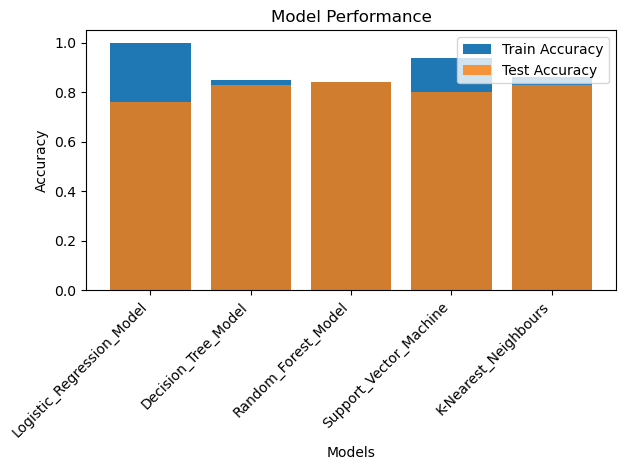

In [186]:
models = ["Logistic_Regression_Model", "Decision_Tree_Model", "Random_Forest_Model", "Support_Vector_Machine", "K-Nearest_Neighbours"]
train_accuracies = [1.00, 0.85, 0.84, 0.94, 0.86]
test_accuracies = [0.76, 0.83, 0.84, 0.80, 0.83]

# Create a bar plot
plt.bar(models, train_accuracies, label='Train Accuracy')
plt.bar(models, test_accuracies, label='Test Accuracy', alpha=0.8)

# Set title and labels
plt.title("Model Performance")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()